#                         Breast Cancer Diagnosis - (ML Algorithms)

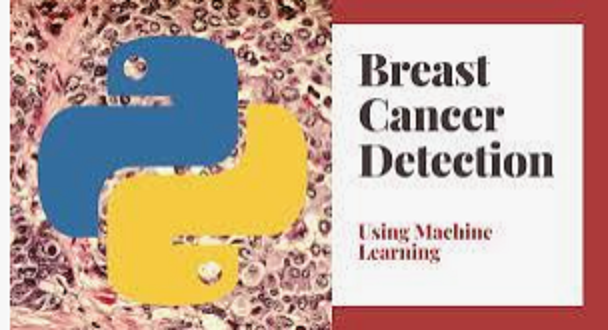

# **Content**

- Data Pre-processing
- Feature Selection/Extraction
- Predictive Modelling
- Project Outcomes & Conclusion

# Data Pre-processing

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df= pd.read_csv("breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Drop Irrelevent Column

In [3]:
df.drop(['id'],axis=1, inplace=True)

# Check Duplicate Rows

In [4]:
#Removal of any Duplicate rows (if any)

#Check Duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


**Observation: There is no duplicate row.**

# Removal of Outliers of indivisual Column

In [5]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Before Removing outliers radius_mean

<AxesSubplot:xlabel='radius_mean'>

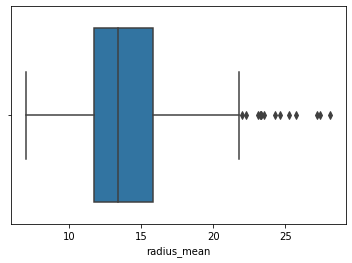

In [6]:
sns.boxplot(data=df, x='radius_mean')

In [7]:
Q1 = df['radius_mean'].quantile(.25)
Q3 = df['radius_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of radius_mean is ', upper_limit)
print('lower limit of radius_mean is ', lower_limit)

upper limit of radius_mean is  21.9
lower limit of radius_mean is  5.579999999999999


In [8]:
df[df['radius_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [9]:
df[(df.radius_mean>upper_limit)|(df.radius_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
122,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
164,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,28.01,28.22,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187
180,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
202,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
212,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
339,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [10]:
df['modified_radius_mean']= np.where(df.radius_mean<lower_limit,lower_limit, 
                            np.where(df.radius_mean>upper_limit,upper_limit,df.radius_mean))

# After Removing Outliers radius_mean

<AxesSubplot:xlabel='modified_radius_mean'>

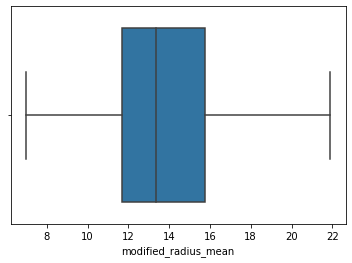

In [11]:
sns.boxplot(data=df, x= 'modified_radius_mean')

# Before Removing outliers texture_mean

<AxesSubplot:xlabel='texture_mean'>

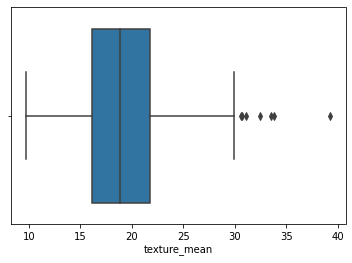

In [12]:
sns.boxplot(data=df, x='texture_mean')

In [13]:
Q1 = df['texture_mean'].quantile(.25)
Q3 = df['texture_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of texture_mean is ', upper_limit)
print('lower limit of texture_mean is ', lower_limit)

upper limit of texture_mean is  30.244999999999997
lower limit of texture_mean is  7.725000000000003


In [14]:
df[df['texture_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean


In [15]:
df[(df.texture_mean>upper_limit)|(df.texture_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean
219,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,...,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568,19.53
232,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,0.1845,...,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307,11.22
239,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,0.1809,...,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496,17.46
259,M,15.53,33.56,103.70,744.9,0.10630,0.16390,0.175100,0.083990,0.2091,...,49.54,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040,15.53
265,M,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.086460,0.1769,...,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218,20.73
455,B,13.38,30.72,86.34,557.2,0.09245,0.07426,0.028190,0.032640,0.1375,...,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675,13.38
562,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.094290,0.2128,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,15.22


In [16]:
df['modified_texture_mean']= np.where(df.texture_mean<lower_limit,lower_limit, 
                            np.where(df.texture_mean>upper_limit,upper_limit,df.texture_mean))

# After Removing Outliers texture_mean

<AxesSubplot:xlabel='modified_texture_mean'>

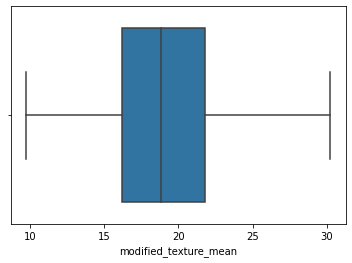

In [17]:
sns.boxplot(data=df, x= 'modified_texture_mean')

# Before Removing outliers perimeter_mean

<AxesSubplot:xlabel='perimeter_mean'>

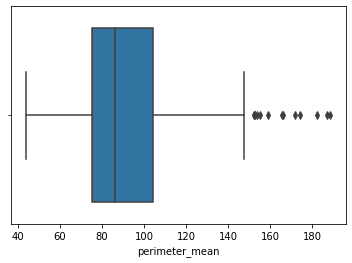

In [18]:
sns.boxplot(data=df, x='perimeter_mean')

In [19]:
Q1 = df['perimeter_mean'].quantile(.25)
Q3 = df['perimeter_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of perimeter_mean is ', upper_limit)
print('lower limit of perimeter_mean is ', lower_limit)

upper limit of perimeter_mean is  147.49499999999998
lower limit of perimeter_mean is  31.775000000000013


In [20]:
df[df['perimeter_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean


In [21]:
df[(df.perimeter_mean>upper_limit)|(df.perimeter_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean
82,M,25.22,24.91,171.5,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,21.9,24.91
108,M,22.27,19.67,152.8,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,21.9,19.67
122,M,24.25,20.20,166.2,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,21.9,20.20
164,M,23.27,22.04,152.1,1686.0,0.08439,0.1145,0.1324,0.09702,0.1801,...,184.2,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,21.9,22.04
180,M,27.22,21.87,182.1,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,21.9,21.87
202,M,23.29,26.67,158.9,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,21.9,26.67
212,M,28.11,18.47,188.5,2499.0,0.11420,0.1516,0.3201,0.15950,0.1648,...,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,21.9,18.47
236,M,23.21,26.97,153.5,1670.0,0.09509,0.1682,0.1950,0.12370,0.1909,...,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,21.9,26.97
339,M,23.51,24.27,155.1,1747.0,0.10690,0.1283,0.2308,0.14100,0.1797,...,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,21.9,24.27
352,M,25.73,17.46,174.2,2010.0,0.11490,0.2363,0.3368,0.19130,0.1956,...,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,21.9,17.46


In [22]:
df['modified_perimeter_mean']= np.where(df.perimeter_mean<lower_limit,lower_limit, 
                            np.where(df.perimeter_mean>upper_limit,upper_limit,df.perimeter_mean))

# After Removing Outliers perimeter_mean

<AxesSubplot:xlabel='modified_perimeter_mean'>

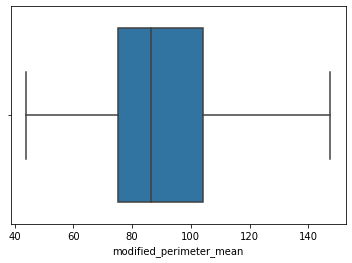

In [23]:
sns.boxplot(data=df, x= 'modified_perimeter_mean')

# Before Removing outliers area_mean

<AxesSubplot:xlabel='area_mean'>

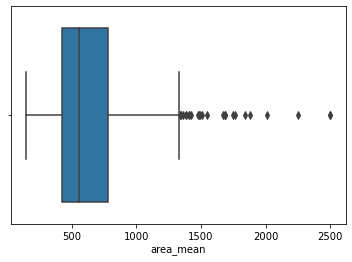

In [24]:
sns.boxplot(data=df, x='area_mean')

In [25]:
Q1 = df['area_mean'].quantile(.25)
Q3 = df['area_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of area_mean is ', upper_limit)
print('lower limit of area_mean is ', lower_limit)

upper limit of area_mean is  1326.3000000000002
lower limit of area_mean is  -123.30000000000001


In [26]:
df[df['area_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean


In [27]:
df[(df.area_mean>upper_limit)|(df.area_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean
23,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,...,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526,21.16,23.040,137.200
82,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,...,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,21.90,24.910,147.495
108,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789,21.90,19.670,147.495
122,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,...,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009,21.90,20.200,147.495
164,M,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,...,2403.0,0.1228,0.3583,0.3948,0.2346,0.3589,0.09187,21.90,22.040,147.495
180,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,21.90,21.870,147.495
202,M,23.29,26.67,158.9,1685.0,0.11410,0.20840,0.3523,0.16200,0.2200,...,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762,21.90,26.670,147.495
212,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,...,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,21.90,18.470,147.495
236,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,21.90,26.970,147.495
250,M,20.94,23.56,138.9,1364.0,0.10070,0.16060,0.2712,0.13100,0.2205,...,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849,20.94,23.560,138.900


In [28]:
df['modified_area_mean']= np.where(df.area_mean<lower_limit,lower_limit, 
                            np.where(df.area_mean>upper_limit,upper_limit,df.area_mean))

# After Removing Outliers area_mean

<AxesSubplot:xlabel='modified_area_mean'>

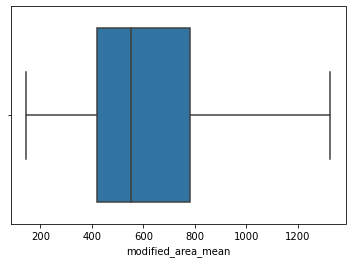

In [29]:

sns.boxplot(data=df, x= 'modified_area_mean')

# Before Removing outliers smoothness_mean

<AxesSubplot:xlabel='smoothness_mean'>

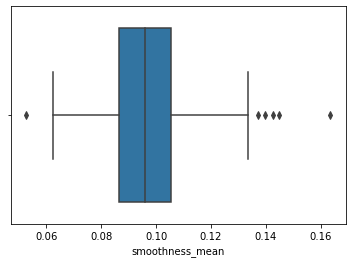

In [30]:
sns.boxplot(data=df, x='smoothness_mean')

In [31]:
Q1 = df['smoothness_mean'].quantile(.25)
Q3 = df['smoothness_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of smoothness_mean is ', upper_limit)
print('lower limit of smoothness_mean is ', lower_limit)

upper limit of smoothness_mean is  0.133695
lower limit of smoothness_mean is  0.057975


In [32]:

df[df['smoothness_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean


In [33]:
df[(df.smoothness_mean>upper_limit)|(df.smoothness_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,11.420,20.38,77.580,386.1
105,M,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.09601,0.1925,...,0.18620,0.40990,0.63760,0.19860,0.3147,0.14050,13.110,15.56,87.210,530.2
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009,21.900,20.20,147.495,1326.3
504,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,...,0.19020,0.34410,0.20990,0.10250,0.3038,0.12520,9.268,12.87,61.490,248.7
520,B,9.295,13.90,59.96,257.8,0.13710,0.12250,0.03332,0.02421,0.2197,...,0.18500,0.20970,0.09996,0.07262,0.3681,0.08982,9.295,13.90,59.960,257.8
568,B,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039,7.760,24.54,47.920,181.0


In [34]:
df['modified_smoothness_mean']= np.where(df.smoothness_mean<lower_limit,lower_limit, 
                            np.where(df.smoothness_mean>upper_limit,upper_limit,df.smoothness_mean))

# After Removing Outliers smoothness_mean

<AxesSubplot:xlabel='modified_smoothness_mean'>

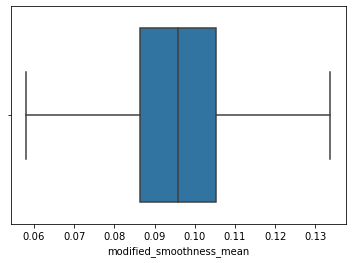

In [35]:
sns.boxplot(data=df, x= 'modified_smoothness_mean')

# Before Removing outliers compactness_mean

<AxesSubplot:xlabel='compactness_mean'>

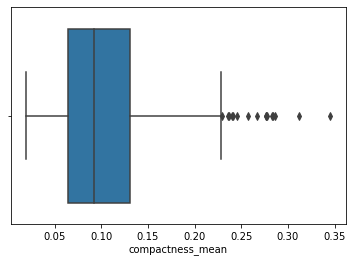

In [36]:
sns.boxplot(data=df, x='compactness_mean')

In [37]:
Q1 = df['compactness_mean'].quantile(.25)
Q3 = df['compactness_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of compactness_mean is ', upper_limit)
print('lower limit of compactness_mean is ', lower_limit)

upper limit of compactness_mean is  0.22861999999999996
lower limit of compactness_mean is  -0.03329999999999997


In [38]:
df[df['compactness_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean


In [39]:
df[(df.compactness_mean>upper_limit)|(df.compactness_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean
0,M,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,17.99,10.38,122.800,1001.0,0.118400
3,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,11.42,20.38,77.580,386.1,0.133695
9,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.2030,...,1.0580,1.1050,0.2210,0.4366,0.20750,12.46,24.04,83.970,475.9,0.118600
12,M,19.17,24.80,132.40,1123.0,0.0974,0.2458,0.2065,0.11180,0.2397,...,0.3903,0.3639,0.1767,0.3176,0.10230,19.17,24.80,132.400,1123.0,0.097400
14,M,13.73,22.61,93.60,578.3,0.1131,0.2293,0.2128,0.08025,0.2069,...,0.7725,0.6943,0.2208,0.3596,0.14310,13.73,22.61,93.600,578.3,0.113100
78,M,20.18,23.97,143.70,1245.0,0.1286,0.3454,0.3754,0.16040,0.2906,...,0.6164,0.7681,0.2508,0.5440,0.09964,20.18,23.97,143.700,1245.0,0.128600
82,M,25.22,24.91,171.50,1878.0,0.1063,0.2665,0.3339,0.18450,0.1829,...,0.6076,0.6476,0.2867,0.2355,0.10510,21.90,24.91,147.495,1326.3,0.106300
108,M,22.27,19.67,152.80,1509.0,0.1326,0.2768,0.4264,0.18230,0.2556,...,0.6997,0.9608,0.2910,0.4055,0.09789,21.90,19.67,147.495,1326.3,0.132600
122,M,24.25,20.20,166.20,1761.0,0.1447,0.2867,0.4268,0.20120,0.2655,...,0.4244,0.5803,0.2248,0.3222,0.08009,21.90,20.20,147.495,1326.3,0.133695
181,M,21.09,26.57,142.70,1311.0,0.1141,0.2832,0.2487,0.14960,0.2395,...,0.7584,0.6780,0.2903,0.4098,0.12840,21.09,26.57,142.700,1311.0,0.114100


In [40]:
df['modified_compactness_mean']= np.where(df.compactness_mean<lower_limit,lower_limit, 
                            np.where(df.compactness_mean>upper_limit,upper_limit,df.compactness_mean))

# After Removing Outliers compactness_mean

<AxesSubplot:xlabel='modified_compactness_mean'>

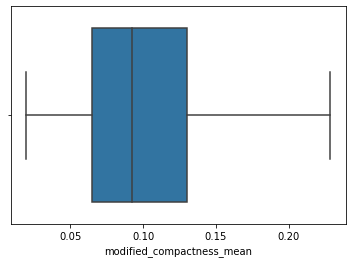

In [41]:
sns.boxplot(data=df, x= 'modified_compactness_mean')

# Before Removing outliers concavity_mean

<AxesSubplot:xlabel='concavity_mean'>

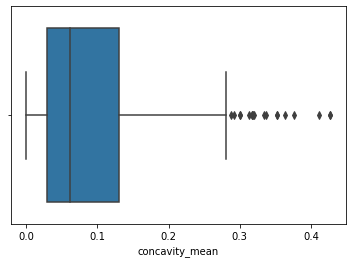

In [42]:
sns.boxplot(data=df, x='concavity_mean')

In [43]:
Q1 = df['concavity_mean'].quantile(.25)
Q3 = df['concavity_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of concavity_mean is ', upper_limit)
print('lower limit of concavity_mean is ', lower_limit)

upper limit of concavity_mean is  0.28241000000000005
lower limit of concavity_mean is  -0.12215000000000001


In [44]:
df[df['concavity_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,0.0,0.0,0.2932,0.09382,6.981,13.43,43.79,143.5,0.117000,0.07568
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,0.0,0.0,0.3105,0.08151,9.738,11.97,61.24,288.5,0.092500,0.04102
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,0.0,0.0,0.2710,0.06164,10.660,15.15,67.49,349.6,0.087920,0.04302
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,0.0,0.0,0.2592,0.07848,8.671,14.45,54.42,227.2,0.091380,0.04276
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,0.0,0.0,0.1909,0.06559,9.720,18.22,60.73,288.1,0.069500,0.02344
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,0.0,0.0,0.3142,0.08116,8.597,18.60,54.09,221.2,0.107400,0.05847
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,0.0,0.0,0.2445,0.08865,8.734,16.84,55.27,234.3,0.103900,0.07428
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,0.0,0.0,0.2409,0.06743,12.270,29.97,77.42,465.4,0.076990,0.03398
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,0.0,0.0,0.3058,0.09938,7.729,25.49,47.98,178.8,0.080980,0.04878
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,0.0,0.0,0.2458,0.06592,10.860,21.48,68.51,360.5,0.074310,0.04227


In [45]:
df[(df.concavity_mean>upper_limit)|(df.concavity_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean
0,M,17.990,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,0.7119,0.2654,0.4601,0.11890,17.990,10.38,122.800,1001.0,0.118400,0.22862
68,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,...,1.2520,0.1750,0.4228,0.11750,9.029,17.33,58.790,250.5,0.106600,0.14130
78,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.3754,0.16040,0.2906,...,0.7681,0.2508,0.5440,0.09964,20.180,23.97,143.700,1245.0,0.128600,0.22862
82,M,25.220,24.91,171.50,1878.0,0.10630,0.2665,0.3339,0.18450,0.1829,...,0.6476,0.2867,0.2355,0.10510,21.900,24.91,147.495,1326.3,0.106300,0.22862
108,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,0.9608,0.2910,0.4055,0.09789,21.900,19.67,147.495,1326.3,0.132600,0.22862
112,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.3003,0.07798,0.1704,...,0.6783,0.1505,0.2398,0.10820,14.260,19.65,97.830,629.9,0.078370,0.22330
122,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.4268,0.20120,0.2655,...,0.5803,0.2248,0.3222,0.08009,21.900,20.20,147.495,1326.3,0.133695,0.22862
152,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,...,0.8216,0.1571,0.3108,0.12590,9.731,15.34,63.780,300.2,0.107200,0.15990
180,M,27.220,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,...,0.5340,0.2688,0.2856,0.08082,21.900,21.87,147.495,1326.3,0.109400,0.19140
202,M,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,0.7892,0.2733,0.3198,0.08762,21.900,26.67,147.495,1326.3,0.114100,0.20840


In [46]:
df['modified_concavity_mean']= np.where(df.concavity_mean<lower_limit,lower_limit, 
                            np.where(df.concavity_mean>upper_limit,upper_limit,df.concavity_mean))

# After Removing Outliers concavity_mean

<AxesSubplot:xlabel='modified_concavity_mean'>

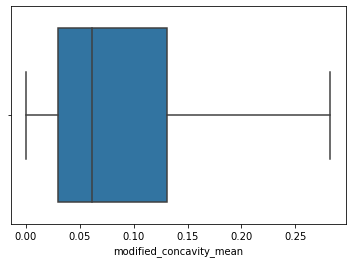

In [47]:
sns.boxplot(data=df, x= 'modified_concavity_mean')

# Before Removing outliers concave points_mean

<AxesSubplot:xlabel='concave points_mean'>

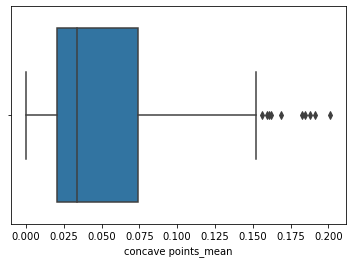

In [48]:
sns.boxplot(data=df, x='concave points_mean')

In [49]:
Q1 = df['concave points_mean'].quantile(.25)
Q3 = df['concave points_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of concave points_mean is ', upper_limit)
print('lower limit of concave points_mean is ', lower_limit)

upper limit of concave points_mean is  0.15453500000000003
lower limit of concave points_mean is  -0.06022500000000003


In [50]:
df[df['concave points_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,0.0,0.2932,0.09382,6.981,13.43,43.79,143.5,0.117000,0.07568,0.0
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,0.0,0.3105,0.08151,9.738,11.97,61.24,288.5,0.092500,0.04102,0.0
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,0.0,0.2710,0.06164,10.660,15.15,67.49,349.6,0.087920,0.04302,0.0
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,0.0,0.2592,0.07848,8.671,14.45,54.42,227.2,0.091380,0.04276,0.0
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,0.0,0.1909,0.06559,9.720,18.22,60.73,288.1,0.069500,0.02344,0.0
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,0.0,0.3142,0.08116,8.597,18.60,54.09,221.2,0.107400,0.05847,0.0
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,0.0,0.2445,0.08865,8.734,16.84,55.27,234.3,0.103900,0.07428,0.0
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,0.0,0.2409,0.06743,12.270,29.97,77.42,465.4,0.076990,0.03398,0.0
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,0.0,0.3058,0.09938,7.729,25.49,47.98,178.8,0.080980,0.04878,0.0
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,0.0,0.2458,0.06592,10.860,21.48,68.51,360.5,0.074310,0.04227,0.0


In [51]:
df[(df['concave points_mean']>upper_limit)|(df['concave points_mean']<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,concave points_worst,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean
78,M,20.18,23.97,143.7,1245.0,0.1286,0.3454,0.3754,0.1604,0.2906,...,0.2508,0.5440,0.09964,20.18,23.97,143.700,1245.0,0.128600,0.22862,0.28241
82,M,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,...,0.2867,0.2355,0.10510,21.90,24.91,147.495,1326.3,0.106300,0.22862,0.28241
108,M,22.27,19.67,152.8,1509.0,0.1326,0.2768,0.4264,0.1823,0.2556,...,0.2910,0.4055,0.09789,21.90,19.67,147.495,1326.3,0.132600,0.22862,0.28241
122,M,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,...,0.2248,0.3222,0.08009,21.90,20.20,147.495,1326.3,0.133695,0.22862,0.28241
180,M,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,...,0.2688,0.2856,0.08082,21.90,21.87,147.495,1326.3,0.109400,0.19140,0.28241
202,M,23.29,26.67,158.9,1685.0,0.1141,0.2084,0.3523,0.1620,0.2200,...,0.2733,0.3198,0.08762,21.90,26.67,147.495,1326.3,0.114100,0.20840,0.28241
212,M,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,...,0.1595,0.1648,0.05525,21.90,18.47,147.495,1326.3,0.114200,0.15160,0.28241
352,M,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,...,0.2756,0.3690,0.08815,21.90,17.46,147.495,1326.3,0.114900,0.22862,0.28241
393,M,21.61,22.28,144.4,1407.0,0.1167,0.2087,0.2810,0.1562,0.2162,...,0.2422,0.3828,0.10070,21.61,22.28,144.400,1326.3,0.116700,0.20870,0.28100
461,M,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,...,0.2625,0.2641,0.07427,21.90,26.27,147.495,1326.3,0.108400,0.19880,0.28241


In [52]:
df['modified_concave points_mean']= np.where(df['concave points_mean']<lower_limit,lower_limit, 
                            np.where(df['concave points_mean']>upper_limit,upper_limit,df['concave points_mean']))

# After Removing Outliers concave points_mean

<AxesSubplot:xlabel='modified_concave points_mean'>

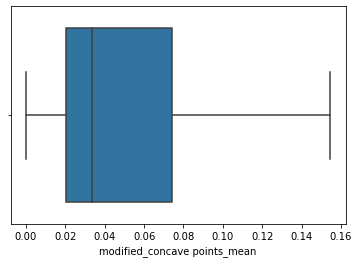

In [53]:
sns.boxplot(data=df, x= 'modified_concave points_mean')

# Before Removing outliers symmetry_mean

<AxesSubplot:xlabel='symmetry_mean'>

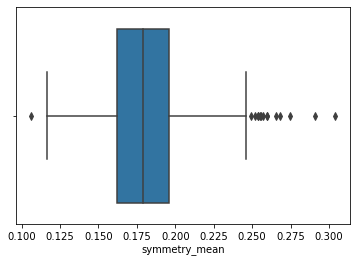

In [54]:
sns.boxplot(data=df, x='symmetry_mean')

In [55]:
Q1 = df['symmetry_mean'].quantile(.25)
Q3 = df['symmetry_mean'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of symmetry_mean is ', upper_limit)
print('lower limit of symmetry_mean is ', lower_limit)

upper limit of symmetry_mean is  0.24640000000000006
lower limit of symmetry_mean is  0.11119999999999995


In [56]:
df[df['symmetry_mean']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean


In [57]:
df[(df.symmetry_mean>upper_limit)|(df.symmetry_mean<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,symmetry_worst,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,0.2597,...,0.6638,0.17300,11.420,20.38,77.580,386.1,0.133695,0.22862,0.241400,0.105200
22,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.09756,0.2521,...,0.4667,0.09946,15.340,14.26,102.500,704.4,0.107300,0.21350,0.207700,0.097560
25,M,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.14010,0.3040,...,0.4066,0.10590,17.140,16.40,116.000,912.7,0.118600,0.22760,0.222900,0.140100
60,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.01290,0.2743,...,0.3557,0.08020,10.170,14.88,64.550,311.9,0.113400,0.08061,0.010840,0.012900
78,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.16040,0.2906,...,0.5440,0.09964,20.180,23.97,143.700,1245.0,0.128600,0.22862,0.282410,0.154535
108,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.426400,0.18230,0.2556,...,0.4055,0.09789,21.900,19.67,147.495,1326.3,0.132600,0.22862,0.282410,0.154535
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.20120,0.2655,...,0.3222,0.08009,21.900,20.20,147.495,1326.3,0.133695,0.22862,0.282410,0.154535
146,M,11.800,16.58,78.99,432.0,0.10910,0.17000,0.165900,0.07415,0.2678,...,0.5774,0.10300,11.800,16.58,78.990,432.0,0.109100,0.17000,0.165900,0.074150
150,B,13.000,20.78,83.51,519.4,0.11350,0.07589,0.031360,0.02645,0.2540,...,0.3196,0.06435,13.000,20.78,83.510,519.4,0.113500,0.07589,0.031360,0.026450
152,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.410800,0.07857,0.2548,...,0.3108,0.12590,9.731,15.34,63.780,300.2,0.107200,0.15990,0.282410,0.078570


In [58]:
df['modified_symmetry_mean']= np.where(df.symmetry_mean<lower_limit,lower_limit, 
                            np.where(df.symmetry_mean>upper_limit,upper_limit,df.symmetry_mean))

# After Removing Outliers symmetry_mean

<AxesSubplot:xlabel='modified_symmetry_mean'>

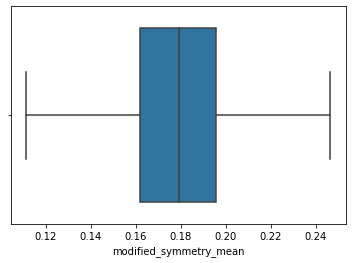

In [59]:
sns.boxplot(data=df, x= 'modified_symmetry_mean')

# Before Removing outliers fractal_dimension_se

<AxesSubplot:xlabel='fractal_dimension_se'>

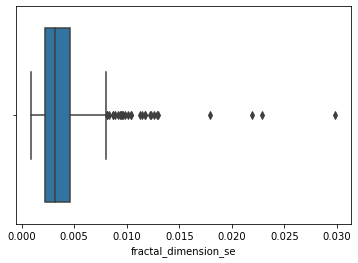

In [60]:
sns.boxplot(data=df, x='fractal_dimension_se')

In [61]:
Q1 = df['fractal_dimension_se'].quantile(.25)
Q3 = df['fractal_dimension_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of fractal_dimension_se is ', upper_limit)
print('lower limit of fractal_dimension_se is ', lower_limit)

upper limit of fractal_dimension_se is  0.008022999999999999
lower limit of fractal_dimension_se is  -0.0012169999999999993


In [62]:
df[df['fractal_dimension_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean


In [63]:
df[(df.fractal_dimension_se>upper_limit)|(df.fractal_dimension_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_worst,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean
3,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,...,0.17300,11.420,20.38,77.580,386.1,0.133695,0.22862,0.24140,0.105200,0.2464
9,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,...,0.20750,12.460,24.04,83.970,475.9,0.118600,0.22862,0.22730,0.085430,0.2030
12,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,0.10230,19.170,24.80,132.400,1123.0,0.097400,0.22862,0.20650,0.111800,0.2397
14,M,13.730,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,...,0.14310,13.730,22.61,93.600,578.3,0.113100,0.22862,0.21280,0.080250,0.2069
68,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,...,0.11750,9.029,17.33,58.790,250.5,0.106600,0.14130,0.28241,0.043750,0.2111
71,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,...,0.10840,8.888,14.64,58.790,244.0,0.097830,0.15310,0.08606,0.028720,0.1902
83,M,19.100,26.29,129.10,1132.0,0.12150,0.1791,0.19370,0.14690,0.1634,...,0.09203,19.100,26.29,129.100,1132.0,0.121500,0.17910,0.19370,0.146900,0.1634
112,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,...,0.10820,14.260,19.65,97.830,629.9,0.078370,0.22330,0.28241,0.077980,0.1704
122,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,...,0.08009,21.900,20.20,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464
145,B,11.900,14.65,78.11,432.8,0.11520,0.1296,0.03710,0.03003,0.1995,...,0.10360,11.900,14.65,78.110,432.8,0.115200,0.12960,0.03710,0.030030,0.1995


In [64]:
df['modified_fractal_dimension_se']= np.where(df.fractal_dimension_se<lower_limit,lower_limit, 
                            np.where(df.fractal_dimension_se>upper_limit,upper_limit,df.fractal_dimension_se))

# After Removing Outliers fractal_dimension_se

<AxesSubplot:xlabel='modified_fractal_dimension_se'>

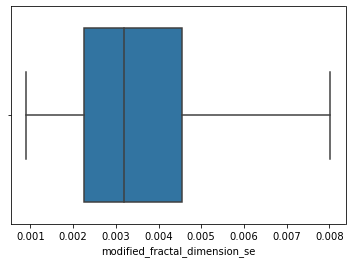

In [65]:
sns.boxplot(data=df, x= 'modified_fractal_dimension_se')

# Before Removing outliers radius_se

<AxesSubplot:xlabel='radius_se'>

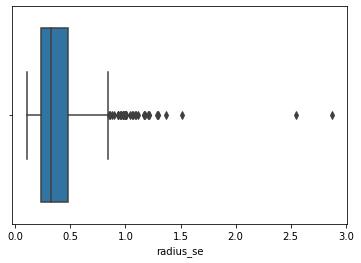

In [66]:
sns.boxplot(data=df, x='radius_se')

In [67]:
Q1 = df['radius_se'].quantile(.25)
Q3 = df['radius_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of radius_se is ', upper_limit)
print('lower limit of radius_se is ', lower_limit)

upper limit of radius_se is  0.84865
lower limit of radius_se is  -0.13735000000000003


In [68]:
df[df['radius_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se


In [69]:
df[(df.radius_se>upper_limit)|(df.radius_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.99,10.380,122.800,1001.0,0.118400,0.22862,0.28241,0.147100,0.2419,0.006193
12,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,19.17,24.800,132.400,1123.0,0.097400,0.22862,0.20650,0.111800,0.2397,0.008023
25,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,17.14,16.400,116.000,912.7,0.118600,0.22760,0.22290,0.140100,0.2464,0.007444
27,M,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,...,18.61,20.250,122.100,1094.0,0.094400,0.10660,0.14900,0.077310,0.1697,0.004217
38,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,14.99,25.200,95.540,698.8,0.093870,0.05131,0.02398,0.028990,0.1565,0.001754
42,M,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,...,19.07,24.810,128.300,1104.0,0.090810,0.21900,0.21070,0.099610,0.2310,0.007646
77,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,...,18.05,16.150,120.200,1006.0,0.106500,0.21460,0.16840,0.108000,0.2152,0.007054
78,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,20.18,23.970,143.700,1245.0,0.128600,0.22862,0.28241,0.154535,0.2464,0.005987
82,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,21.90,24.910,147.495,1326.3,0.106300,0.22862,0.28241,0.154535,0.1829,0.005893
108,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,21.90,19.670,147.495,1326.3,0.132600,0.22862,0.28241,0.154535,0.2464,0.005037


In [70]:
df['modified_radius_se']= np.where(df.radius_se<lower_limit,lower_limit, 
                            np.where(df.radius_se>upper_limit,upper_limit,df.radius_se))

# After Removing Outliers radius_se

<AxesSubplot:xlabel='modified_radius_se'>

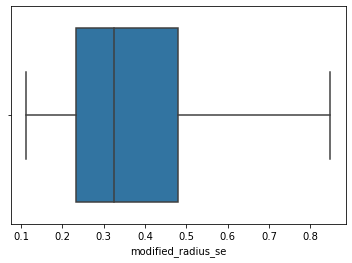

In [71]:
sns.boxplot(data=df, x= 'modified_radius_se')

# Before Removing outliers texture_se

<AxesSubplot:xlabel='texture_se'>

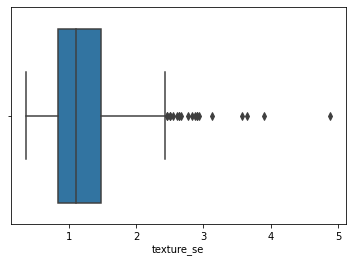

In [72]:
sns.boxplot(data=df, x='texture_se')

In [73]:
Q1 = df['texture_se'].quantile(.25)
Q3 = df['texture_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of texture_se is ', upper_limit)
print('lower limit of texture_se is ', lower_limit)

upper limit of texture_se is  2.43415
lower limit of texture_se is  -0.12625000000000008


In [74]:
df[df['texture_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se


In [75]:
df[(df.texture_se>upper_limit)|(df.texture_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se
12,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,24.80,132.400,1123.0,0.097400,0.22862,0.20650,0.111800,0.2397,0.008023,0.84865
83,M,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,26.29,129.100,1132.0,0.121500,0.17910,0.19370,0.146900,0.1634,0.008023,0.51900
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,20.20,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,0.008023,0.84865
136,B,11.710,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.02600,0.1339,...,16.67,74.720,423.6,0.105100,0.06095,0.03592,0.026000,0.1339,0.003707,0.44890
152,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,...,15.34,63.780,300.2,0.107200,0.15990,0.28241,0.078570,0.2464,0.008023,0.82450
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,...,18.22,60.730,288.1,0.069500,0.02344,0.00000,0.000000,0.1653,0.001688,0.35390
245,B,10.480,19.86,66.72,337.7,0.10700,0.05971,0.04831,0.03070,0.1737,...,19.86,66.720,337.7,0.107000,0.05971,0.04831,0.030700,0.1737,0.003560,0.37190
258,M,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,...,23.20,110.200,773.5,0.110900,0.22862,0.28241,0.137700,0.2464,0.006042,0.84865
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,...,18.60,54.090,221.2,0.107400,0.05847,0.00000,0.000000,0.2163,0.006820,0.33680
345,B,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,...,14.71,66.200,321.6,0.098820,0.09159,0.03581,0.020370,0.1633,0.006758,0.33800


In [76]:
df['modified_texture_se']= np.where(df.texture_se<lower_limit,lower_limit, 
                            np.where(df.texture_se>upper_limit,upper_limit,df.texture_se))

# After Removing Outliers texture_se

<AxesSubplot:xlabel='modified_texture_se'>

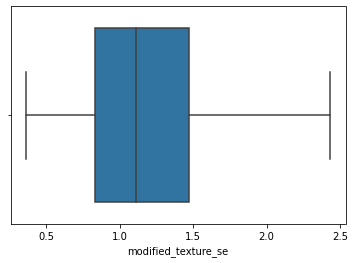

In [77]:
sns.boxplot(data=df, x= 'modified_texture_se')

# Before Removing outliers perimeter_se

<AxesSubplot:xlabel='perimeter_se'>

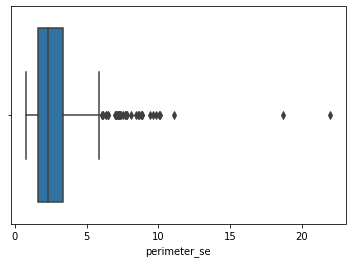

In [78]:
sns.boxplot(data=df, x='perimeter_se')

In [79]:
Q1 = df['perimeter_se'].quantile(.25)
Q3 = df['perimeter_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of perimeter_se is ', upper_limit)
print('lower limit of perimeter_se is ', lower_limit)

upper limit of perimeter_se is  5.983499999999999
lower limit of perimeter_se is  -1.0205000000000002


In [80]:
df[df['perimeter_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se


In [81]:
df[(df.perimeter_se>upper_limit)|(df.perimeter_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,122.800,1001.0,0.118400,0.22862,0.28241,0.147100,0.2419,0.006193,0.84865,0.90530
12,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,132.400,1123.0,0.097400,0.22862,0.20650,0.111800,0.2397,0.008023,0.84865,2.43415
25,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,116.000,912.7,0.118600,0.22760,0.22290,0.140100,0.2464,0.007444,0.84865,0.97600
38,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,...,95.540,698.8,0.093870,0.05131,0.02398,0.028990,0.1565,0.001754,0.84865,2.18800
42,M,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,...,128.300,1104.0,0.090810,0.21900,0.21070,0.099610,0.2310,0.007646,0.84865,1.66600
77,M,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.16840,0.10800,0.2152,...,120.200,1006.0,0.106500,0.21460,0.16840,0.108000,0.2152,0.007054,0.84865,0.55050
78,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,143.700,1245.0,0.128600,0.22862,0.28241,0.154535,0.2464,0.005987,0.84865,1.88500
82,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,147.495,1326.3,0.106300,0.22862,0.28241,0.154535,0.1829,0.005893,0.84865,1.47400
108,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,147.495,1326.3,0.132600,0.22862,0.28241,0.154535,0.2464,0.005037,0.84865,1.54500
122,M,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,147.495,1326.3,0.133695,0.22862,0.28241,0.154535,0.2464,0.008023,0.84865,2.43415


In [82]:
df['modified_perimeter_se']= np.where(df.perimeter_se<lower_limit,lower_limit, 
                            np.where(df.perimeter_se>upper_limit,upper_limit,df.perimeter_se))

# After Removing Outliers perimeter_se

<AxesSubplot:xlabel='modified_perimeter_se'>

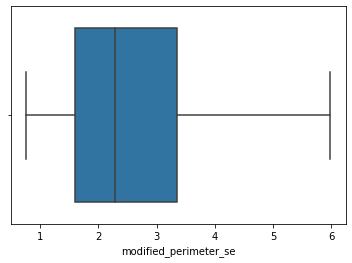

In [83]:
sns.boxplot(data=df, x= 'modified_perimeter_se')

# Before Removing outliers area_se

<AxesSubplot:xlabel='area_se'>

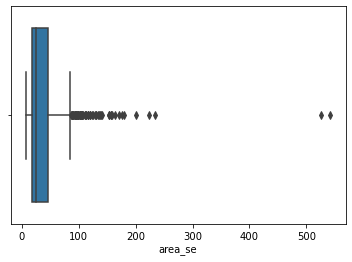

In [84]:
sns.boxplot(data=df, x='area_se')

In [85]:
Q1 = df['area_se'].quantile(.25)
Q3 = df['area_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of area_se is ', upper_limit)
print('lower limit of area_se is ', lower_limit)

upper limit of area_se is  86.19999999999999
lower limit of area_se is  -23.15999999999999


In [86]:
df[df['area_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se


In [87]:
df[(df.area_se>upper_limit)|(df.area_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se
0,M,17.99,10.38,122.8,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,1001.0,0.11840,0.22862,0.28241,0.14710,0.2419,0.006193,0.84865,0.90530,5.9835
2,M,19.69,21.25,130.0,1203.0,0.10960,0.1599,0.1974,0.12790,0.2069,...,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.004571,0.74560,0.78690,4.5850
4,M,20.29,14.34,135.1,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.005115,0.75720,0.78130,5.4380
12,M,19.17,24.80,132.4,1123.0,0.09740,0.2458,0.2065,0.11180,0.2397,...,1123.0,0.09740,0.22862,0.20650,0.11180,0.2397,0.008023,0.84865,2.43415,5.9835
18,M,19.81,22.15,130.0,1260.0,0.09831,0.1027,0.1479,0.09498,0.1582,...,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.001997,0.75820,1.01700,5.8650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,M,20.55,20.86,137.8,1308.0,0.10460,0.1739,0.2085,0.13220,0.2127,...,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,0.002689,0.69860,0.99010,4.7060
563,M,20.92,25.09,143.0,1347.0,0.10990,0.2236,0.3174,0.14740,0.2149,...,1326.3,0.10990,0.22360,0.28241,0.14740,0.2149,0.006213,0.84865,1.02600,5.9835
564,M,21.56,22.39,142.0,1479.0,0.11100,0.1159,0.2439,0.13890,0.1726,...,1326.3,0.11100,0.11590,0.24390,0.13890,0.1726,0.004239,0.84865,1.25600,5.9835
565,M,20.13,28.25,131.2,1261.0,0.09780,0.1034,0.1440,0.09791,0.1752,...,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.002498,0.76550,2.43415,5.2030


In [88]:
df['modified_area_se']= np.where(df.area_se<lower_limit,lower_limit, 
                            np.where(df.area_se>upper_limit,upper_limit,df.area_se))

# After Removing Outliers area_se

<AxesSubplot:xlabel='modified_area_se'>

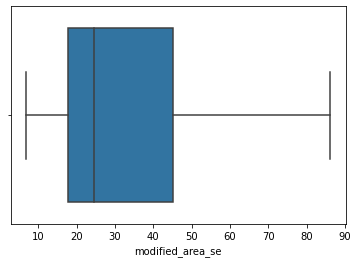

In [89]:
sns.boxplot(data=df, x= 'modified_area_se')

# Before Removing outliers smoothness_se

<AxesSubplot:xlabel='smoothness_se'>

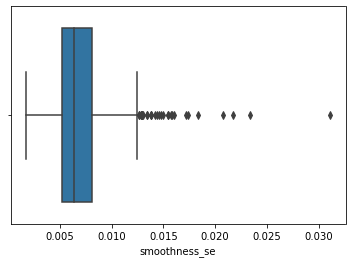

In [90]:
sns.boxplot(data=df, x='smoothness_se')

In [91]:
Q1 = df['smoothness_se'].quantile(.25)
Q3 = df['smoothness_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of smoothness_se is ', upper_limit)
print('lower limit of smoothness_se is ', lower_limit)

upper limit of smoothness_se is  0.012611499999999998
lower limit of smoothness_se is  0.0007035000000000019


In [92]:
df[df['smoothness_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se


In [93]:
df[(df.smoothness_se>upper_limit)|(df.smoothness_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se
71,B,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.1902,...,0.097830,0.15310,0.086060,0.028720,0.1902,0.008023,0.52620,0.85220,3.1680,25.44
76,B,13.530,10.94,87.91,559.2,0.12910,0.10470,0.068770,0.065560,0.2403,...,0.129100,0.10470,0.068770,0.065560,0.2403,0.006164,0.41010,1.01400,2.6520,32.65
110,B,9.777,16.99,62.50,290.2,0.10370,0.08404,0.043340,0.017780,0.1584,...,0.103700,0.08404,0.043340,0.017780,0.1584,0.004638,0.40300,1.42400,2.7470,22.87
111,B,12.630,20.76,82.15,480.4,0.09933,0.12090,0.106500,0.060210,0.1735,...,0.099330,0.12090,0.106500,0.060210,0.1735,0.005891,0.34240,1.80300,2.7110,20.48
116,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.092630,0.023080,0.1305,...,0.094620,0.12430,0.092630,0.023080,0.1305,0.005601,0.31320,0.97890,3.2800,16.94
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,...,0.133695,0.22862,0.282410,0.154535,0.2464,0.008023,0.84865,2.43415,5.9835,86.20
173,B,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,...,0.100600,0.05743,0.023630,0.025830,0.1566,0.004785,0.20730,1.80500,1.3770,19.08
176,B,9.904,18.06,64.60,302.4,0.09699,0.12940,0.130700,0.037160,0.1669,...,0.096990,0.12940,0.130700,0.037160,0.1669,0.008023,0.43110,2.26100,3.1320,27.48
185,B,10.080,15.11,63.76,317.5,0.09267,0.04695,0.001597,0.002404,0.1703,...,0.092670,0.04695,0.001597,0.002404,0.1703,0.003470,0.42450,1.26800,2.6800,26.43
196,M,13.770,22.29,90.63,588.9,0.12000,0.12670,0.138500,0.065260,0.1834,...,0.120000,0.12670,0.138500,0.065260,0.1834,0.004306,0.61910,2.11200,4.9060,49.70


In [94]:
df['modified_smoothness_se']= np.where(df.smoothness_se<lower_limit,lower_limit, 
                            np.where(df.smoothness_se>upper_limit,upper_limit,df.smoothness_se))

# After Removing Outliers smoothness_se

<AxesSubplot:xlabel='modified_smoothness_se'>

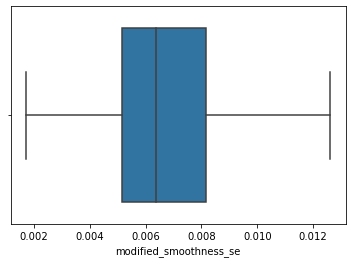

In [95]:
sns.boxplot(data=df, x= 'modified_smoothness_se')

# Before Removing outliers compactness_se

<AxesSubplot:xlabel='compactness_se'>

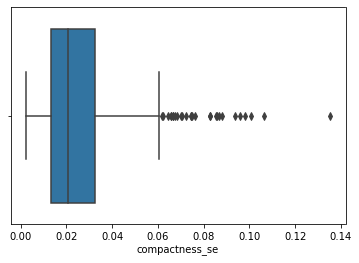

In [96]:
sns.boxplot(data=df, x='compactness_se')

In [97]:
Q1 = df['compactness_se'].quantile(.25)
Q3 = df['compactness_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of compactness_se is ', upper_limit)
print('lower limit of compactness_se is ', lower_limit)

upper limit of compactness_se is  0.061505
lower limit of compactness_se is  -0.015974999999999996


In [98]:
df[df['compactness_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se


In [99]:
df[(df.compactness_se>upper_limit)|(df.compactness_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se
3,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,...,0.22862,0.24140,0.105200,0.2464,0.008023,0.49560,1.15600,3.4450,27.230,0.009110
9,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,...,0.22862,0.22730,0.085430,0.2030,0.008023,0.29760,1.59900,2.0390,23.940,0.007149
12,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,0.22862,0.20650,0.111800,0.2397,0.008023,0.84865,2.43415,5.9835,86.200,0.003139
42,M,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,...,0.21900,0.21070,0.099610,0.2310,0.007646,0.84865,1.66600,5.9835,86.200,0.006548
62,M,14.250,22.15,96.42,645.7,0.10490,0.2008,0.21350,0.08653,0.1949,...,0.20080,0.21350,0.086530,0.1949,0.006113,0.70360,1.26800,5.3730,60.780,0.009407
68,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,...,0.14130,0.28241,0.043750,0.2111,0.008023,0.32740,1.19400,1.8850,17.670,0.009549
71,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,...,0.15310,0.08606,0.028720,0.1902,0.008023,0.52620,0.85220,3.1680,25.440,0.012611
78,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,...,0.22862,0.28241,0.154535,0.2464,0.005987,0.84865,1.88500,5.9835,86.200,0.010380
108,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,...,0.22862,0.28241,0.154535,0.2464,0.005037,0.84865,1.54500,5.9835,86.200,0.006515
112,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,...,0.22330,0.28241,0.077980,0.1704,0.008023,0.36280,1.49000,3.3990,29.250,0.005298


In [100]:
df['modified_compactness_se']= np.where(df.compactness_se<lower_limit,lower_limit, 
                            np.where(df.compactness_se>upper_limit,upper_limit,df.compactness_se))

# After Removing Outliers compactness_se

<AxesSubplot:xlabel='modified_compactness_se'>

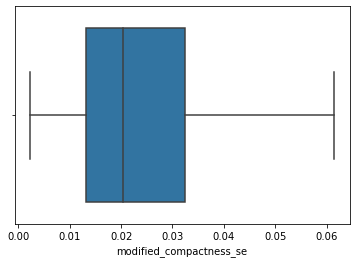

In [101]:
sns.boxplot(data=df, x= 'modified_compactness_se')

# Before Removing outliers concavity_se

<AxesSubplot:xlabel='concavity_se'>

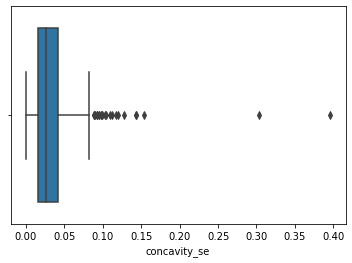

In [102]:
sns.boxplot(data=df, x='concavity_se')

In [103]:
Q1 = df['concavity_se'].quantile(.25)
Q3 = df['concavity_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of concavity_se is ', upper_limit)
print('lower limit of concavity_se is ', lower_limit)

upper limit of concavity_se is  0.08249
lower limit of concavity_se is  -0.025349999999999998


In [104]:
df[df['concavity_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,0.0,0.0,0.1930,0.004100,0.2241,1.50800,1.553,9.833,0.010190,0.010840
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,0.0,0.0,0.1903,0.003220,0.1988,0.49600,1.218,12.260,0.006040,0.005656
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,0.0,0.0,0.1928,0.001002,0.3309,1.92500,2.155,21.980,0.008713,0.010170
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,0.0,0.0,0.1722,0.003399,0.2204,0.78730,1.435,11.360,0.009172,0.008007
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,0.0,0.0,0.1653,0.001688,0.3539,2.43415,2.230,21.690,0.001713,0.006736
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,0.0,0.0,0.2163,0.006820,0.3368,2.43415,2.222,17.810,0.012611,0.014030
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,0.0,0.0,0.1985,0.006736,0.5169,2.07900,3.167,28.850,0.012611,0.019660
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,0.0,0.0,0.1701,0.003136,0.4455,2.43415,2.884,35.130,0.007339,0.008243
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,0.0,0.0,0.1870,0.006872,0.3777,1.46200,2.492,19.140,0.012611,0.009692
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,0.0,0.0,0.1661,0.002228,0.3163,1.30400,2.115,20.670,0.009579,0.011040


In [105]:
df[(df.concavity_se>upper_limit)|(df.concavity_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se
12,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,0.20650,0.111800,0.2397,0.008023,0.84865,2.43415,5.9835,86.200,0.003139,0.061505
42,M,19.070,24.81,128.30,1104.0,0.09081,0.2190,0.21070,0.09961,0.2310,...,0.21070,0.099610,0.2310,0.007646,0.84865,1.66600,5.9835,86.200,0.006548,0.061505
68,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,...,0.28241,0.043750,0.2111,0.008023,0.32740,1.19400,1.8850,17.670,0.009549,0.061505
78,M,20.180,23.97,143.70,1245.0,0.12860,0.3454,0.37540,0.16040,0.2906,...,0.28241,0.154535,0.2464,0.005987,0.84865,1.88500,5.9835,86.200,0.010380,0.061505
108,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.42640,0.18230,0.2556,...,0.28241,0.154535,0.2464,0.005037,0.84865,1.54500,5.9835,86.200,0.006515,0.061505
112,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,...,0.28241,0.077980,0.1704,0.008023,0.36280,1.49000,3.3990,29.250,0.005298,0.061505
116,B,8.950,15.76,58.74,245.2,0.09462,0.1243,0.09263,0.02308,0.1305,...,0.09263,0.023080,0.1305,0.005601,0.31320,0.97890,3.2800,16.940,0.012611,0.061505
122,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,...,0.28241,0.154535,0.2464,0.008023,0.84865,2.43415,5.9835,86.200,0.012611,0.061505
152,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,...,0.28241,0.078570,0.2464,0.008023,0.82450,2.43415,4.0730,49.850,0.010970,0.061505
176,B,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,...,0.13070,0.037160,0.1669,0.008023,0.43110,2.26100,3.1320,27.480,0.012611,0.061505


In [106]:
df['modified_concavity_se']= np.where(df.concavity_se<lower_limit,lower_limit, 
                            np.where(df.concavity_se>upper_limit,upper_limit,df.concavity_se))

# After Removing Outliers concavity_se

<AxesSubplot:xlabel='modified_concavity_se'>

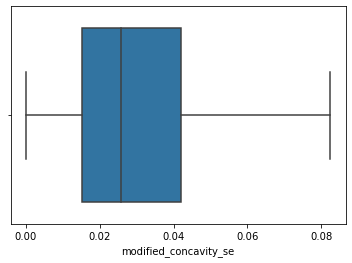

In [107]:
sns.boxplot(data=df, x= 'modified_concavity_se')

# Before Removing outliers concave points_se

<AxesSubplot:xlabel='concave points_se'>

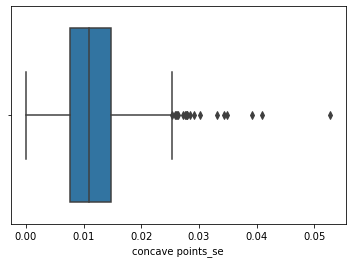

In [108]:
sns.boxplot(data=df, x='concave points_se')

In [109]:
Q1 = df['concave points_se'].quantile(.25)
Q3 = df['concave points_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of concave points_se is ', upper_limit)
print('lower limit of concave points_se is ', lower_limit)

upper limit of concave points_se is  0.025318
lower limit of concave points_se is  -0.0029699999999999996


In [110]:
df[df['concave points_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,0.0,0.1930,0.004100,0.2241,1.50800,1.553,9.833,0.010190,0.010840,0.0
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,0.0,0.1903,0.003220,0.1988,0.49600,1.218,12.260,0.006040,0.005656,0.0
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,0.0,0.1928,0.001002,0.3309,1.92500,2.155,21.980,0.008713,0.010170,0.0
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,0.0,0.1722,0.003399,0.2204,0.78730,1.435,11.360,0.009172,0.008007,0.0
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,0.0,0.1653,0.001688,0.3539,2.43415,2.230,21.690,0.001713,0.006736,0.0
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,0.0,0.2163,0.006820,0.3368,2.43415,2.222,17.810,0.012611,0.014030,0.0
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,0.0,0.1985,0.006736,0.5169,2.07900,3.167,28.850,0.012611,0.019660,0.0
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,0.0,0.1701,0.003136,0.4455,2.43415,2.884,35.130,0.007339,0.008243,0.0
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,0.0,0.1870,0.006872,0.3777,1.46200,2.492,19.140,0.012611,0.009692,0.0
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,0.0,0.1661,0.002228,0.3163,1.30400,2.115,20.670,0.009579,0.011040,0.0


In [111]:
df[(df['concave points_se']>upper_limit)|(df['concave points_se']<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concave points_mean,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se
12,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,0.111800,0.2397,0.008023,0.84865,2.43415,5.9835,86.200,0.003139,0.061505,0.08249
42,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,...,0.099610,0.2310,0.007646,0.84865,1.66600,5.9835,86.200,0.006548,0.061505,0.08249
68,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,...,0.043750,0.2111,0.008023,0.32740,1.19400,1.8850,17.670,0.009549,0.061505,0.08249
78,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,0.154535,0.2464,0.005987,0.84865,1.88500,5.9835,86.200,0.010380,0.061505,0.08249
138,M,14.950,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,0.086240,0.1957,0.002887,0.84865,1.45200,5.9835,86.200,0.010000,0.034800,0.06577
152,B,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,...,0.078570,0.2464,0.008023,0.82450,2.43415,4.0730,49.850,0.010970,0.061505,0.08249
161,M,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,...,0.096670,0.1741,0.003362,0.84865,0.63360,5.9835,86.200,0.009406,0.030550,0.04344
210,M,20.580,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,...,0.095610,0.1765,0.002365,0.84865,1.48000,5.9835,86.200,0.008124,0.036110,0.05489
213,M,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,0.065970,0.1308,0.008023,0.52960,1.66700,3.7670,58.530,0.012611,0.061505,0.08249
258,M,15.660,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,...,0.137700,0.2464,0.006042,0.84865,2.43415,5.9835,86.200,0.012360,0.059950,0.08232


In [112]:
df['modified_concave points_se']= np.where(df['concave points_se']<lower_limit,lower_limit, 
                            np.where(df['concave points_se']>upper_limit,upper_limit,df['concave points_se']))

# After Removing Outliers concave points_se

<AxesSubplot:xlabel='modified_concave points_se'>

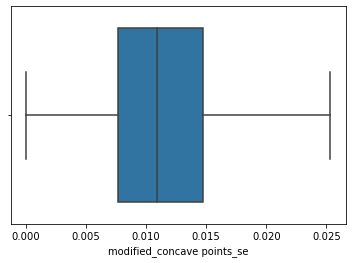

In [113]:
sns.boxplot(data=df, x= 'modified_concave points_se')

# Before Removing outliers symmetry_se

<AxesSubplot:xlabel='symmetry_se'>

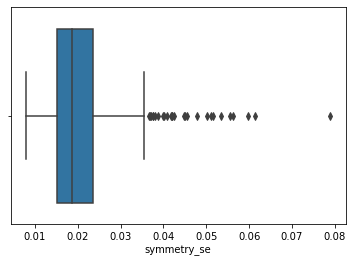

In [114]:
sns.boxplot(data=df, x='symmetry_se')

In [115]:
Q1 = df['symmetry_se'].quantile(.25)
Q3 = df['symmetry_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of symmetry_se is ', upper_limit)
print('lower limit of symmetry_se is ', lower_limit)

upper limit of symmetry_se is  0.035960000000000006
lower limit of symmetry_se is  0.0026799999999999984


In [116]:
df[df['symmetry_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se


In [117]:
df[(df.symmetry_se>upper_limit)|(df.symmetry_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_symmetry_mean,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,0.2464,0.008023,0.49560,1.15600,3.4450,27.23,0.009110,0.061505,0.056610,0.018670
12,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.206500,0.111800,0.2397,...,0.2397,0.008023,0.84865,2.43415,5.9835,86.20,0.003139,0.061505,0.082490,0.025318
22,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.2521,...,0.2464,0.004394,0.43880,0.70960,3.3840,44.91,0.006789,0.053280,0.064460,0.022520
42,M,19.070,24.81,128.30,1104.0,0.09081,0.21900,0.210700,0.099610,0.2310,...,0.2310,0.007646,0.84865,1.66600,5.9835,86.20,0.006548,0.061505,0.082490,0.025318
60,B,10.170,14.88,64.55,311.9,0.11340,0.08061,0.010840,0.012900,0.2743,...,0.2464,0.005953,0.51580,1.44100,3.3120,34.62,0.007514,0.010990,0.007665,0.008193
63,B,9.173,13.86,59.20,260.9,0.07721,0.08751,0.059880,0.021800,0.2341,...,0.2341,0.005822,0.40980,2.26500,2.6080,23.52,0.008738,0.039380,0.043120,0.015600
68,B,9.029,17.33,58.79,250.5,0.10660,0.14130,0.313000,0.043750,0.2111,...,0.2111,0.008023,0.32740,1.19400,1.8850,17.67,0.009549,0.061505,0.082490,0.025318
78,M,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.375400,0.160400,0.2906,...,0.2464,0.005987,0.84865,1.88500,5.9835,86.20,0.010380,0.061505,0.082490,0.025318
119,M,17.950,20.01,114.20,982.0,0.08402,0.06722,0.072930,0.055960,0.2129,...,0.2129,0.001902,0.55060,1.21400,3.3570,54.04,0.004024,0.008422,0.022910,0.009863
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.426800,0.201200,0.2655,...,0.2464,0.008023,0.84865,2.43415,5.9835,86.20,0.012611,0.061505,0.082490,0.018220


In [118]:
df['modified_symmetry_se']= np.where(df.symmetry_se<lower_limit,lower_limit, 
                            np.where(df.symmetry_se>upper_limit,upper_limit,df.symmetry_se))

# After Removing Outliers symmetry_se

<AxesSubplot:xlabel='modified_symmetry_se'>

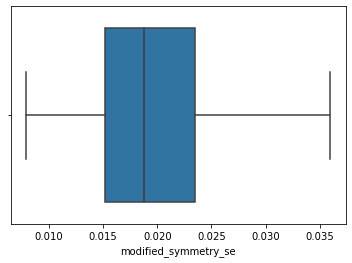

In [119]:
sns.boxplot(data=df, x= 'modified_symmetry_se')

# Before Removing outliers fractal_dimension_se

<AxesSubplot:xlabel='fractal_dimension_se'>

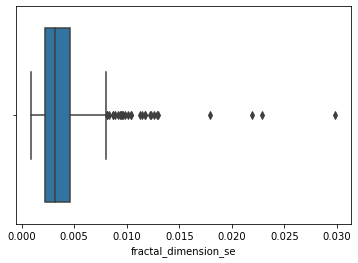

In [120]:
sns.boxplot(data=df, x='fractal_dimension_se')

In [121]:
Q1 = df['fractal_dimension_se'].quantile(.25)
Q3 = df['fractal_dimension_se'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of fractal_dimension_se is ', upper_limit)
print('lower limit of fractal_dimension_se is ', lower_limit)

upper limit of fractal_dimension_se is  0.008022999999999999
lower limit of fractal_dimension_se is  -0.0012169999999999993


In [122]:
df[df['fractal_dimension_se']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se


In [123]:
df[(df.fractal_dimension_se>upper_limit)|(df.fractal_dimension_se<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se
3,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.24140,0.10520,0.2597,...,0.008023,0.49560,1.15600,3.4450,27.230,0.009110,0.061505,0.05661,0.018670,0.03596
9,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.22730,0.08543,0.2030,...,0.008023,0.29760,1.59900,2.0390,23.940,0.007149,0.061505,0.07743,0.014320,0.01789
12,M,19.170,24.80,132.40,1123.0,0.09740,0.2458,0.20650,0.11180,0.2397,...,0.008023,0.84865,2.43415,5.9835,86.200,0.003139,0.061505,0.08249,0.025318,0.03596
14,M,13.730,22.61,93.60,578.3,0.11310,0.2293,0.21280,0.08025,0.2069,...,0.008023,0.21210,1.16900,2.0610,19.210,0.006429,0.059360,0.05501,0.016280,0.01961
68,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,...,0.008023,0.32740,1.19400,1.8850,17.670,0.009549,0.061505,0.08249,0.025318,0.03596
71,B,8.888,14.64,58.79,244.0,0.09783,0.1531,0.08606,0.02872,0.1902,...,0.008023,0.52620,0.85220,3.1680,25.440,0.012611,0.061505,0.05671,0.017660,0.02541
83,M,19.100,26.29,129.10,1132.0,0.12150,0.1791,0.19370,0.14690,0.1634,...,0.008023,0.51900,2.43415,5.8010,67.100,0.007545,0.060500,0.02134,0.018430,0.03056
112,B,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,...,0.008023,0.36280,1.49000,3.3990,29.250,0.005298,0.061505,0.08249,0.022920,0.02566
122,M,24.250,20.20,166.20,1761.0,0.14470,0.2867,0.42680,0.20120,0.2655,...,0.008023,0.84865,2.43415,5.9835,86.200,0.012611,0.061505,0.08249,0.018220,0.03596
145,B,11.900,14.65,78.11,432.8,0.11520,0.1296,0.03710,0.03003,0.1995,...,0.008023,0.39620,0.65380,3.0210,25.030,0.010170,0.047410,0.02789,0.011100,0.03127


In [124]:
df['modified_fractal_dimension_se']= np.where(df.fractal_dimension_se<lower_limit,lower_limit, 
                            np.where(df.fractal_dimension_se>upper_limit,upper_limit,df.fractal_dimension_se))

# After Removing Outliers fractal_dimension_se

<AxesSubplot:xlabel='modified_fractal_dimension_se'>

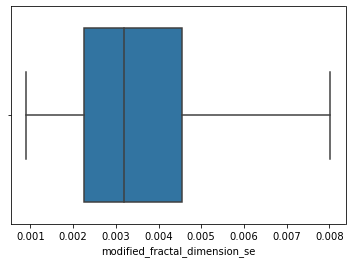

In [125]:
sns.boxplot(data=df, x= 'modified_fractal_dimension_se')

# Before Removing outliers radius_worst

<AxesSubplot:xlabel='radius_worst'>

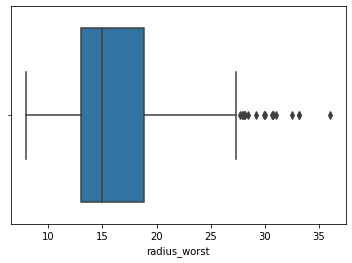

In [126]:
sns.boxplot(data=df, x='radius_worst')

In [127]:
Q1 = df['radius_worst'].quantile(.25)
Q3 = df['radius_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of radius_worst is ', upper_limit)
print('lower limit of radius_worst is ', lower_limit)

upper limit of radius_worst is  27.459999999999997
lower limit of radius_worst is  4.340000000000002


In [128]:
df[df['radius_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se


In [129]:
df[(df.radius_worst>upper_limit)|(df.radius_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_fractal_dimension_se,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se
23,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,...,0.001987,0.69170,1.1270,4.3030,86.2,0.004728,0.012590,0.01715,0.010380,0.01083
82,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,...,0.005893,0.84865,1.4740,5.9835,86.2,0.008166,0.056930,0.05730,0.020300,0.01065
108,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,0.005037,0.84865,1.5450,5.9835,86.2,0.006515,0.061505,0.08249,0.024800,0.03112
164,M,23.27,22.04,152.1,1686.0,0.08439,0.11450,0.1324,0.09702,0.1801,...,0.003740,0.66420,0.8561,4.6030,86.2,0.004910,0.025440,0.02822,0.016230,0.01956
180,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,0.002747,0.83610,1.4810,5.8200,86.2,0.004631,0.025370,0.03109,0.012410,0.01575
212,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,...,0.004476,0.84865,1.4760,5.9835,86.2,0.012611,0.027720,0.06389,0.014070,0.03596
219,M,19.53,32.47,128.0,1223.0,0.08420,0.11300,0.1145,0.06637,0.1428,...,0.002256,0.73920,1.3210,4.7220,86.2,0.005539,0.026440,0.02664,0.010780,0.01332
236,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,0.003053,0.84865,0.9635,5.9835,86.2,0.006428,0.028630,0.04497,0.017160,0.01590
265,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,...,0.002299,0.84865,1.6170,5.9835,86.2,0.004551,0.014780,0.02143,0.009280,0.01367
272,M,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,...,0.004614,0.84865,1.3520,5.9835,86.2,0.005687,0.049600,0.06329,0.015610,0.01924


In [130]:
df['modified_radius_worst']= np.where(df.radius_worst<lower_limit,lower_limit, 
                            np.where(df.radius_worst>upper_limit,upper_limit,df.radius_worst))

# After Removing Outliers radius_worst

<AxesSubplot:xlabel='modified_radius_worst'>

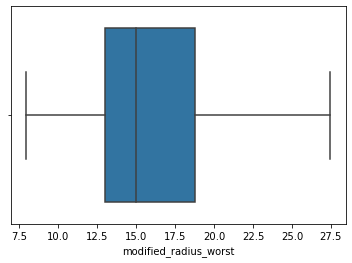

In [131]:
sns.boxplot(data=df, x= 'modified_radius_worst')

# Before Removing outliers texture_worst

<AxesSubplot:xlabel='texture_worst'>

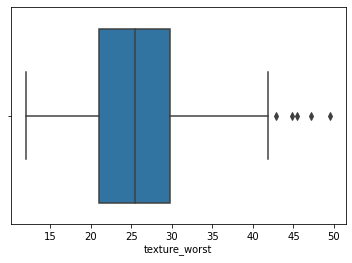

In [132]:
sns.boxplot(data=df, x='texture_worst')

In [133]:
Q1 = df['texture_worst'].quantile(.25)
Q3 = df['texture_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of texture_worst is ', upper_limit)
print('lower limit of texture_worst is ', lower_limit)

upper limit of texture_worst is  42.68
lower limit of texture_worst is  8.119999999999997


In [134]:
df[df['texture_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst


In [135]:
df[(df.texture_worst>upper_limit)|(df.texture_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_radius_se,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst
219,M,19.53,32.47,128.0,1223.0,0.08420,0.1130,0.1145,0.06637,0.1428,...,0.73920,1.3210,4.7220,86.20,0.005539,0.02644,0.02664,0.01078,0.013320,27.46
239,M,17.46,39.28,113.4,920.6,0.09812,0.1298,0.1417,0.08811,0.1809,...,0.53660,0.8561,3.0020,49.00,0.004860,0.02785,0.02602,0.01374,0.012260,22.51
259,M,15.53,33.56,103.7,744.9,0.10630,0.1639,0.1751,0.08399,0.2091,...,0.24190,1.2780,1.9030,23.02,0.005345,0.02556,0.02889,0.01022,0.009947,18.49
265,M,20.73,31.12,135.7,1419.0,0.09469,0.1143,0.1367,0.08646,0.1769,...,0.84865,1.6170,5.9835,86.20,0.004551,0.01478,0.02143,0.00928,0.013670,27.46
562,M,15.22,30.62,103.4,716.9,0.10480,0.2087,0.2550,0.09429,0.2128,...,0.26020,1.2050,2.3620,22.65,0.004625,0.04844,0.07359,0.01608,0.021370,17.52


In [136]:
df['modified_texture_worst']= np.where(df.texture_worst<lower_limit,lower_limit, 
                            np.where(df.texture_worst>upper_limit,upper_limit,df.texture_worst))

# After Removing Outliers texture_worst

<AxesSubplot:xlabel='modified_texture_worst'>

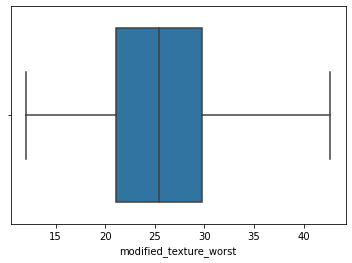

In [137]:
sns.boxplot(data=df, x= 'modified_texture_worst')

# Before Removing outliers perimeter_worst

<AxesSubplot:xlabel='perimeter_worst'>

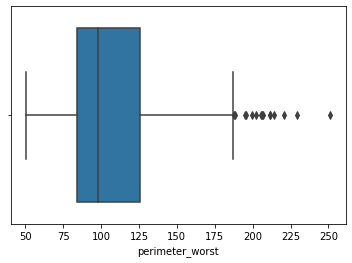

In [138]:
sns.boxplot(data=df, x='perimeter_worst')

In [139]:
Q1 = df['perimeter_worst'].quantile(.25)
Q3 = df['perimeter_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of perimeter_worst is ', upper_limit)
print('lower limit of perimeter_worst is ', lower_limit)

upper limit of perimeter_worst is  187.335
lower limit of perimeter_worst is  22.17499999999999


In [140]:
df[df['perimeter_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst


In [141]:
df[(df.perimeter_worst>upper_limit)|(df.perimeter_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_texture_se,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst
23,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,...,1.1270,4.3030,86.2,0.004728,0.012590,0.01715,0.010380,0.01083,27.46,35.59
82,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,...,1.4740,5.9835,86.2,0.008166,0.056930,0.05730,0.020300,0.01065,27.46,33.62
108,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,1.5450,5.9835,86.2,0.006515,0.061505,0.08249,0.024800,0.03112,27.46,28.01
180,M,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,1.4810,5.8200,86.2,0.004631,0.025370,0.03109,0.012410,0.01575,27.46,32.85
212,M,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,...,1.4760,5.9835,86.2,0.012611,0.027720,0.06389,0.014070,0.03596,27.46,18.47
236,M,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,0.9635,5.9835,86.2,0.006428,0.028630,0.04497,0.017160,0.01590,27.46,34.51
265,M,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,...,1.6170,5.9835,86.2,0.004551,0.014780,0.02143,0.009280,0.01367,27.46,42.68
272,M,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,...,1.3520,5.9835,86.2,0.005687,0.049600,0.06329,0.015610,0.01924,27.46,28.18
339,M,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,...,0.9245,5.9835,86.2,0.006292,0.019710,0.03582,0.013010,0.01479,27.46,30.73
352,M,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,...,0.8509,5.9835,86.2,0.006369,0.042430,0.04266,0.015080,0.02335,27.46,23.58


In [142]:
df['modified_perimeter_worst']= np.where(df.perimeter_worst<lower_limit,lower_limit, 
                            np.where(df.perimeter_worst>upper_limit,upper_limit,df.perimeter_worst))

# After Removing Outliers perimeter_worst

<AxesSubplot:xlabel='modified_perimeter_worst'>

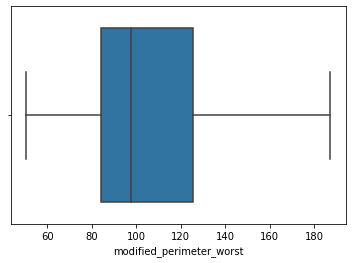

In [143]:
sns.boxplot(data=df, x= 'modified_perimeter_worst')

# Before Removing outliers area_worst

<AxesSubplot:xlabel='area_worst'>

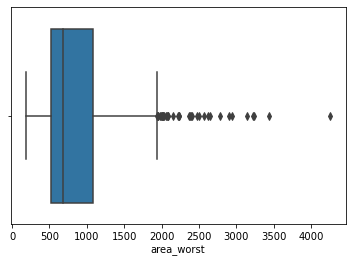

In [144]:
sns.boxplot(data=df, x='area_worst')

In [145]:
Q1 = df['area_worst'].quantile(.25)
Q3 = df['area_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of area_worst is ', upper_limit)
print('lower limit of area_worst is ', lower_limit)

upper limit of area_worst is  1937.0500000000002
lower limit of area_worst is  -337.7500000000001


In [146]:
df[df['area_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst


In [147]:
df[(df.area_worst>upper_limit)|(df.area_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_perimeter_se,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,5.9835,86.20,0.006399,0.049040,0.05373,0.015870,0.03003,25.38,17.33,184.600
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,3.3980,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,24.99,23.41,158.800
18,M,19.81,22.15,130.0,1260.0,0.09831,0.10270,0.1479,0.09498,0.1582,...,5.8650,86.20,0.006494,0.018930,0.03391,0.015210,0.01356,27.32,30.88,186.800
23,M,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,...,4.3030,86.20,0.004728,0.012590,0.01715,0.010380,0.01083,27.46,35.59,187.335
24,M,16.65,21.38,110.0,904.6,0.11210,0.14570,0.1525,0.09170,0.1995,...,5.4550,86.20,0.006048,0.018820,0.02741,0.011300,0.01468,26.46,31.56,177.000
56,M,19.21,18.57,125.5,1152.0,0.10530,0.12670,0.1323,0.08994,0.1917,...,4.8370,86.20,0.006458,0.023060,0.02945,0.015380,0.01852,26.14,28.14,170.100
82,M,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,...,5.9835,86.20,0.008166,0.056930,0.05730,0.020300,0.01065,27.46,33.62,187.335
108,M,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,5.9835,86.20,0.006515,0.061505,0.08249,0.024800,0.03112,27.46,28.01,187.335
122,M,24.25,20.20,166.2,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,...,5.9835,86.20,0.012611,0.061505,0.08249,0.018220,0.03596,26.02,23.99,180.900
162,M,19.59,18.15,130.7,1214.0,0.11200,0.16660,0.2508,0.12860,0.2027,...,4.7920,86.20,0.004057,0.022770,0.04029,0.013030,0.01686,26.73,26.39,174.900


In [148]:
df['modified_area_worst']= np.where(df.area_worst<lower_limit,lower_limit, 
                            np.where(df.area_worst>upper_limit,upper_limit,df.area_worst))

# After Removing Outliers area_worst

<AxesSubplot:xlabel='modified_area_worst'>

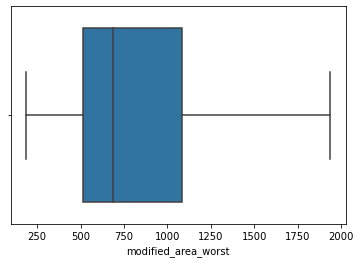

In [149]:
sns.boxplot(data=df, x= 'modified_area_worst')

# Before Removing outliers smoothness_worst

<AxesSubplot:xlabel='smoothness_worst'>

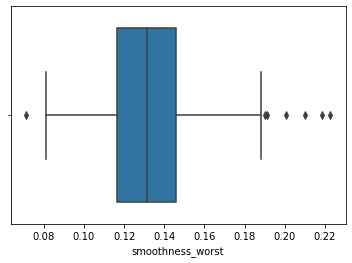

In [150]:
sns.boxplot(data=df, x='smoothness_worst')

In [151]:
Q1 = df['smoothness_worst'].quantile(.25)
Q3 = df['smoothness_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of smoothness_worst is ', upper_limit)
print('lower limit of smoothness_worst is ', lower_limit)

upper limit of smoothness_worst is  0.1901
lower limit of smoothness_worst is  0.07250000000000001


In [152]:
df[df['smoothness_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst


In [153]:
df[(df.smoothness_worst>upper_limit)|(df.smoothness_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_area_se,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst
3,M,11.420,20.38,77.58,386.1,0.1425,0.28390,0.2414,0.10520,0.2597,...,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,14.910,26.50,98.87,567.7
41,M,10.950,21.35,71.90,371.1,0.1227,0.12180,0.1044,0.05669,0.1895,...,16.97,0.008064,0.017640,0.02595,0.01037,0.01357,12.840,35.34,87.22,514.0
192,B,9.720,18.22,60.73,288.1,0.0695,0.02344,0.0000,0.00000,0.1653,...,21.69,0.001713,0.006736,0.00000,0.00000,0.03596,9.968,20.83,62.25,303.8
203,M,13.810,23.75,91.56,597.8,0.1323,0.17680,0.1558,0.09176,0.2251,...,52.72,0.008824,0.031080,0.03112,0.01291,0.01998,19.200,41.85,128.50,1153.0
379,M,11.080,18.83,73.30,361.6,0.1216,0.21540,0.1689,0.06367,0.2196,...,13.99,0.007405,0.045490,0.04588,0.01339,0.01738,13.240,32.82,91.76,508.1
504,B,9.268,12.87,61.49,248.7,0.1634,0.22390,0.0973,0.05252,0.2378,...,20.04,0.009783,0.045420,0.03483,0.02188,0.02542,10.280,16.38,69.05,300.2
505,B,9.676,13.14,64.12,272.5,0.1255,0.22040,0.1188,0.07038,0.2057,...,17.67,0.012611,0.048880,0.05189,0.01450,0.02632,10.600,18.04,69.47,328.1


In [154]:
df['modified_smoothness_worst']= np.where(df.smoothness_worst<lower_limit,lower_limit, 
                            np.where(df.smoothness_worst>upper_limit,upper_limit,df.smoothness_worst))

# After Removing Outliers smoothness_worst

<AxesSubplot:xlabel='modified_smoothness_worst'>

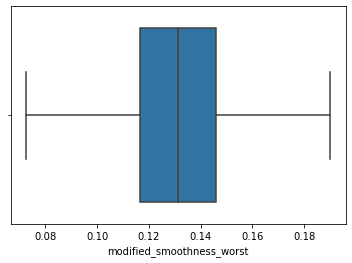

In [155]:
sns.boxplot(data=df, x= 'modified_smoothness_worst')

# Before Removing outliers compactness_worst

<AxesSubplot:xlabel='compactness_worst'>

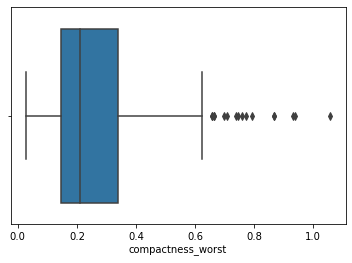

In [156]:
sns.boxplot(data=df, x='compactness_worst')

In [157]:
Q1 = df['compactness_worst'].quantile(.25)
Q3 = df['compactness_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of compactness_worst is ', upper_limit)
print('lower limit of compactness_worst is ', lower_limit)

upper limit of compactness_worst is  0.6269500000000001
lower limit of compactness_worst is  -0.14065000000000005


In [158]:
df[df['compactness_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst


In [159]:
df[(df.compactness_worst>upper_limit)|(df.compactness_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_smoothness_se,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,0.006399,0.049040,0.05373,0.015870,0.03003,25.38,17.33,184.600,1937.05,0.1622
3,M,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,0.009110,0.061505,0.05661,0.018670,0.03596,14.91,26.50,98.870,567.70,0.1901
9,M,12.46,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,...,0.007149,0.061505,0.07743,0.014320,0.01789,15.09,40.68,97.650,711.40,0.1853
14,M,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,...,0.006429,0.059360,0.05501,0.016280,0.01961,15.03,32.01,108.800,697.70,0.1651
15,M,14.54,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,0.005607,0.042400,0.04741,0.010900,0.01857,17.46,37.13,124.100,943.20,0.1678
26,M,14.58,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,...,0.004452,0.030550,0.02681,0.013520,0.01454,17.62,33.21,122.400,896.90,0.1525
33,M,19.27,26.47,127.90,1162.0,0.09401,0.1719,0.1657,0.07593,0.1853,...,0.005015,0.033180,0.03497,0.009643,0.01543,24.15,30.90,161.400,1813.00,0.1509
42,M,19.07,24.81,128.30,1104.0,0.09081,0.2190,0.2107,0.09961,0.2310,...,0.006548,0.061505,0.08249,0.025318,0.03596,24.09,33.17,177.400,1651.00,0.1247
72,M,17.20,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,...,0.005820,0.056160,0.04252,0.011270,0.01527,23.32,33.82,151.600,1681.00,0.1585
108,M,22.27,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,0.006515,0.061505,0.08249,0.024800,0.03112,27.46,28.01,187.335,1937.05,0.1701


In [160]:
df['modified_compactness_worst']= np.where(df.compactness_worst<lower_limit,lower_limit, 
                            np.where(df.compactness_worst>upper_limit,upper_limit,df.compactness_worst))

# After Removing Outliers compactness_worst

<AxesSubplot:xlabel='modified_compactness_worst'>

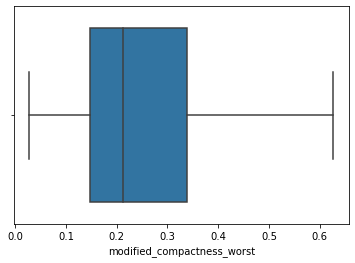

In [161]:
sns.boxplot(data=df, x= 'modified_compactness_worst')

# Before Removing outliers concavity_worst

<AxesSubplot:xlabel='concavity_worst'>

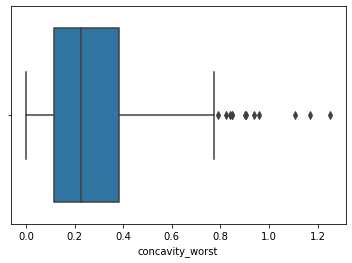

In [162]:
sns.boxplot(data=df, x='concavity_worst')

In [163]:
Q1 = df['concavity_worst'].quantile(.25)
Q3 = df['concavity_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of concavity_worst is ', upper_limit)
print('lower limit of concavity_worst is ', lower_limit)

upper limit of concavity_worst is  0.7855000000000001
lower limit of concavity_worst is  -0.2881000000000001


In [164]:
df[df['concavity_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,0.010840,0.0,0.0,0.02659,7.930,19.54,50.41,185.2,0.15840,0.12020
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,0.005656,0.0,0.0,0.02277,10.620,14.10,66.53,342.9,0.12340,0.07204
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,0.010170,0.0,0.0,0.03265,11.540,19.20,73.20,408.3,0.10760,0.06791
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,0.008007,0.0,0.0,0.02711,9.262,17.04,58.36,259.2,0.11620,0.07057
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,0.006736,0.0,0.0,0.03596,9.968,20.83,62.25,303.8,0.07250,0.02729
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,0.014030,0.0,0.0,0.03596,8.952,22.44,56.65,240.1,0.13470,0.07767
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,0.019660,0.0,0.0,0.01865,10.170,22.80,64.01,317.0,0.14600,0.13100
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,0.008243,0.0,0.0,0.03141,13.450,38.05,85.08,558.9,0.09422,0.05213
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,0.009692,0.0,0.0,0.02882,9.077,30.92,57.17,248.0,0.12560,0.08340
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,0.011040,0.0,0.0,0.03004,11.660,24.77,74.08,412.3,0.10010,0.07348


In [165]:
df[(df.concavity_worst>upper_limit)|(df.concavity_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_compactness_se,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst
9,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,...,0.061505,0.07743,0.014320,0.01789,15.09,40.68,97.650,711.40,0.1853,0.62695
68,B,9.029,17.33,58.79,250.5,0.10660,0.1413,0.3130,0.04375,0.2111,...,0.061505,0.08249,0.025318,0.03596,10.31,22.65,65.500,324.70,0.1482,0.43650
108,M,22.270,19.67,152.80,1509.0,0.13260,0.2768,0.4264,0.18230,0.2556,...,0.061505,0.08249,0.024800,0.03112,27.46,28.01,187.335,1937.05,0.1701,0.62695
152,B,9.731,15.34,63.78,300.2,0.10720,0.1599,0.4108,0.07857,0.2548,...,0.061505,0.08249,0.025318,0.03546,11.02,19.49,71.040,380.50,0.1292,0.27720
190,M,14.220,23.12,94.37,609.9,0.10750,0.2413,0.1981,0.06618,0.2384,...,0.061505,0.08249,0.016660,0.03596,15.74,37.18,106.400,762.40,0.1533,0.62695
202,M,23.290,26.67,158.90,1685.0,0.11410,0.2084,0.3523,0.16200,0.2200,...,0.051210,0.08249,0.024650,0.02175,25.12,32.68,177.000,1937.05,0.1536,0.41670
252,M,19.730,19.82,130.70,1206.0,0.10620,0.1849,0.2417,0.09740,0.1733,...,0.050570,0.06800,0.019710,0.01467,25.28,25.59,159.800,1933.00,0.1710,0.59550
379,M,11.080,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,0.2196,...,0.045490,0.04588,0.013390,0.01738,13.24,32.82,91.760,508.10,0.1901,0.62695
400,M,17.910,21.02,124.40,994.0,0.12300,0.2576,0.3189,0.11980,0.2113,...,0.037180,0.06165,0.010510,0.01591,20.80,27.78,149.600,1304.00,0.1873,0.59170
430,M,14.900,22.53,102.10,685.0,0.09947,0.2225,0.2733,0.09711,0.2041,...,0.061505,0.07926,0.022340,0.01499,16.35,27.57,125.400,832.70,0.1419,0.62695


In [166]:
df['modified_concavity_worst']= np.where(df.concavity_worst<lower_limit,lower_limit, 
                            np.where(df.concavity_worst>upper_limit,upper_limit,df.concavity_worst))

# After Removing Outliers concavity_worst

<AxesSubplot:xlabel='modified_concavity_worst'>

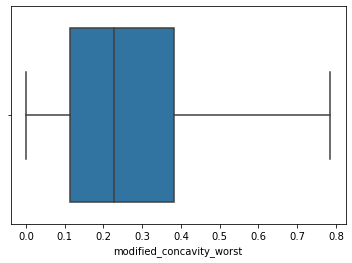

In [167]:
sns.boxplot(data=df, x= 'modified_concavity_worst')

# Having no outliers concave points_worst

<AxesSubplot:xlabel='concave points_worst'>

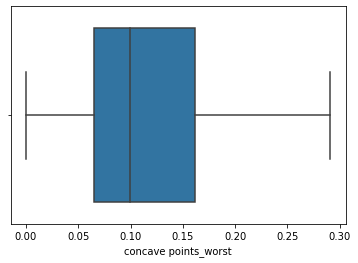

In [168]:
sns.boxplot(data=df, x='concave points_worst')

In [169]:
Q1 = df['concave points_worst'].quantile(.25)
Q3 = df['concave points_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of concave points_worst is ', upper_limit)
print('lower limit of concave points_worst is ', lower_limit)

upper limit of concave points_worst is  0.30610499999999996
lower limit of concave points_worst is  -0.07977499999999997


In [170]:
df[df['concave points_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst
101,B,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,0.0,0.0,0.02659,7.930,19.54,50.41,185.2,0.15840,0.12020,0.0
140,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,0.0,0.0,0.02277,10.620,14.10,66.53,342.9,0.12340,0.07204,0.0
174,B,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,0.0,0.0,0.03265,11.540,19.20,73.20,408.3,0.10760,0.06791,0.0
175,B,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,0.0,0.0,0.02711,9.262,17.04,58.36,259.2,0.11620,0.07057,0.0
192,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,0.0,0.0,0.03596,9.968,20.83,62.25,303.8,0.07250,0.02729,0.0
314,B,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,0.0,0.0,0.03596,8.952,22.44,56.65,240.1,0.13470,0.07767,0.0
391,B,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,0.0,0.0,0.01865,10.170,22.80,64.01,317.0,0.14600,0.13100,0.0
473,B,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,0.0,0.0,0.03141,13.450,38.05,85.08,558.9,0.09422,0.05213,0.0
538,B,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,0.0,0.0,0.02882,9.077,30.92,57.17,248.0,0.12560,0.08340,0.0
550,B,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,0.0,0.0,0.03004,11.660,24.77,74.08,412.3,0.10010,0.07348,0.0


In [171]:
df[(df['concave points_worst']>upper_limit)|(df['concave points_worst']<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concavity_se,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst


In [172]:
df['modified_concave points_worst']= np.where(df['concave points_worst']<lower_limit,lower_limit, 
                            np.where(df['concave points_worst']>upper_limit,upper_limit,df['concave points_worst']))

<AxesSubplot:xlabel='modified_concave points_worst'>

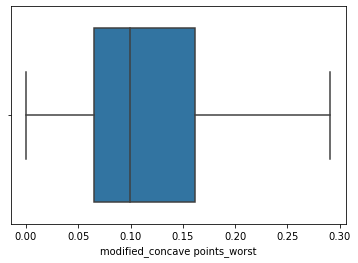

In [173]:
sns.boxplot(data=df, x= 'modified_concave points_worst')

# Before Removing outliers symmetry_worst

<AxesSubplot:xlabel='symmetry_worst'>

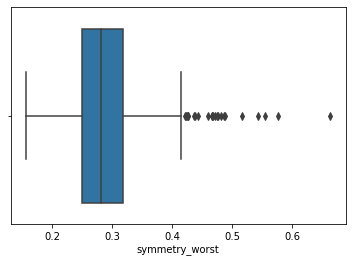

In [174]:
sns.boxplot(data=df, x='symmetry_worst')

In [175]:
Q1 = df['symmetry_worst'].quantile(.25)
Q3 = df['symmetry_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of symmetry_worst is ', upper_limit)
print('lower limit of symmetry_worst is ', lower_limit)

upper limit of symmetry_worst is  0.41915
lower limit of symmetry_worst is  0.14915


In [176]:
df[df['symmetry_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst,modified_concave points_worst


In [177]:
df[(df.symmetry_worst>upper_limit)|(df.symmetry_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_concave points_se,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst,modified_concave points_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.015870,0.03003,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.26540
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.018670,0.03596,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.25750
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,0.012260,0.02143,15.49,30.73,106.20,739.30,0.1703,0.54010,0.5390,0.20600
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,0.014320,0.01789,15.09,40.68,97.65,711.40,0.1853,0.62695,0.7855,0.22100
15,M,14.540,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,...,0.010900,0.01857,17.46,37.13,124.10,943.20,0.1678,0.62695,0.7026,0.17120
22,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,...,0.022520,0.03596,18.07,19.08,125.10,980.90,0.1390,0.59540,0.6305,0.23930
26,M,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,...,0.013520,0.01454,17.62,33.21,122.40,896.90,0.1525,0.62695,0.5539,0.27010
31,M,11.840,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,...,0.010440,0.02273,16.82,28.12,119.40,888.70,0.1637,0.57750,0.6956,0.15460
34,M,16.130,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,...,0.009067,0.01703,20.21,27.26,132.70,1261.00,0.1446,0.58040,0.5274,0.18640
35,M,16.740,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,...,0.011950,0.02789,20.01,29.02,133.50,1229.00,0.1563,0.38350,0.5409,0.18130


In [178]:
df['modified_symmetry_worst']= np.where(df.symmetry_worst<lower_limit,lower_limit, 
                            np.where(df.symmetry_worst>upper_limit,upper_limit,df.symmetry_worst))

# After Removing Outliers symmetry_worst

<AxesSubplot:xlabel='modified_symmetry_worst'>

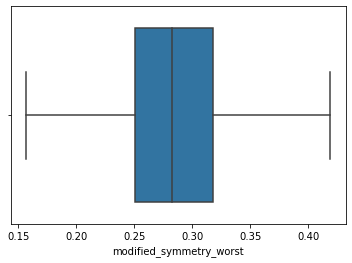

In [179]:
sns.boxplot(data=df, x= 'modified_symmetry_worst')

# Before Removing outliers fractal_dimension_worst

<AxesSubplot:xlabel='fractal_dimension_worst'>

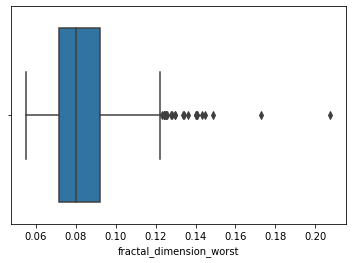

In [180]:
sns.boxplot(data=df, x='fractal_dimension_worst')

In [181]:
Q1 = df['fractal_dimension_worst'].quantile(.25)
Q3 = df['fractal_dimension_worst'].quantile(.75)
IQR = Q3-Q1
upper_limit = Q3+(1.5*IQR)
lower_limit = Q1-(1.5*IQR)
print('upper limit of fractal_dimension_worst is ', upper_limit)
print('lower limit of fractal_dimension_worst is ', lower_limit)

upper limit of fractal_dimension_worst is  0.12301
lower limit of fractal_dimension_worst is  0.04053


In [182]:
df[df['fractal_dimension_worst']==0]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst,modified_concave points_worst,modified_symmetry_worst


In [183]:
df[(df.fractal_dimension_worst>upper_limit)|(df.fractal_dimension_worst<lower_limit)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,modified_symmetry_se,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst,modified_concave points_worst,modified_symmetry_worst
3,M,11.420,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,0.03596,14.910,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.25750,0.41915
5,M,12.450,15.70,82.57,477.1,0.12780,0.1700,0.1578,0.08089,0.2087,...,0.02165,15.470,23.75,103.40,741.60,0.1791,0.52490,0.5355,0.17410,0.39850
9,M,12.460,24.04,83.97,475.9,0.11860,0.2396,0.2273,0.08543,0.2030,...,0.01789,15.090,40.68,97.65,711.40,0.1853,0.62695,0.7855,0.22100,0.41915
14,M,13.730,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,...,0.01961,15.030,32.01,108.80,697.70,0.1651,0.62695,0.6943,0.22080,0.35960
15,M,14.540,27.54,96.73,658.8,0.11390,0.1595,0.1639,0.07364,0.2303,...,0.01857,17.460,37.13,124.10,943.20,0.1678,0.62695,0.7026,0.17120,0.41915
26,M,14.580,21.53,97.41,644.8,0.10540,0.1868,0.1425,0.08783,0.2252,...,0.01454,17.620,33.21,122.40,896.90,0.1525,0.62695,0.5539,0.27010,0.41915
31,M,11.840,18.70,77.93,440.6,0.11090,0.1516,0.1218,0.05182,0.2301,...,0.02273,16.820,28.12,119.40,888.70,0.1637,0.57750,0.6956,0.15460,0.41915
34,M,16.130,17.88,107.00,807.2,0.10400,0.1559,0.1354,0.07752,0.1998,...,0.01703,20.210,27.26,132.70,1261.00,0.1446,0.58040,0.5274,0.18640,0.41915
72,M,17.200,24.52,114.20,929.4,0.10710,0.1830,0.1692,0.07944,0.1927,...,0.01527,23.320,33.82,151.60,1681.00,0.1585,0.62695,0.6566,0.18990,0.33130
105,M,13.110,15.56,87.21,530.2,0.13980,0.1765,0.2071,0.09601,0.1925,...,0.01547,16.310,22.40,106.40,827.20,0.1862,0.40990,0.6376,0.19860,0.31470


In [184]:
df['modified_fractal_dimension_worst']= np.where(df.fractal_dimension_worst<lower_limit,lower_limit, 
                            np.where(df.fractal_dimension_worst>upper_limit,upper_limit,df.fractal_dimension_worst))

# After Removing Outliers fractal_dimension_worst

<AxesSubplot:xlabel='modified_fractal_dimension_worst'>

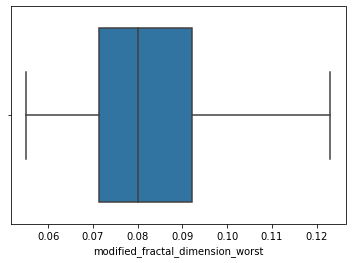

In [185]:
sns.boxplot(data=df, x= 'modified_fractal_dimension_worst')

# Drop Columns

In [186]:
#droping columns which are not needed for the training
df=df.drop(["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"],axis=1)

In [187]:
df['diagnosis']=df['diagnosis'].apply(lambda x : 1 if x=='M' else 0)

In [188]:
df.head()

,diagnosis,modified_radius_mean,modified_texture_mean,modified_perimeter_mean,modified_area_mean,modified_smoothness_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_symmetry_mean,...,modified_radius_worst,modified_texture_worst,modified_perimeter_worst,modified_area_worst,modified_smoothness_worst,modified_compactness_worst,modified_concavity_worst,modified_concave points_worst,modified_symmetry_worst,modified_fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


# Feature Selection/Extraction

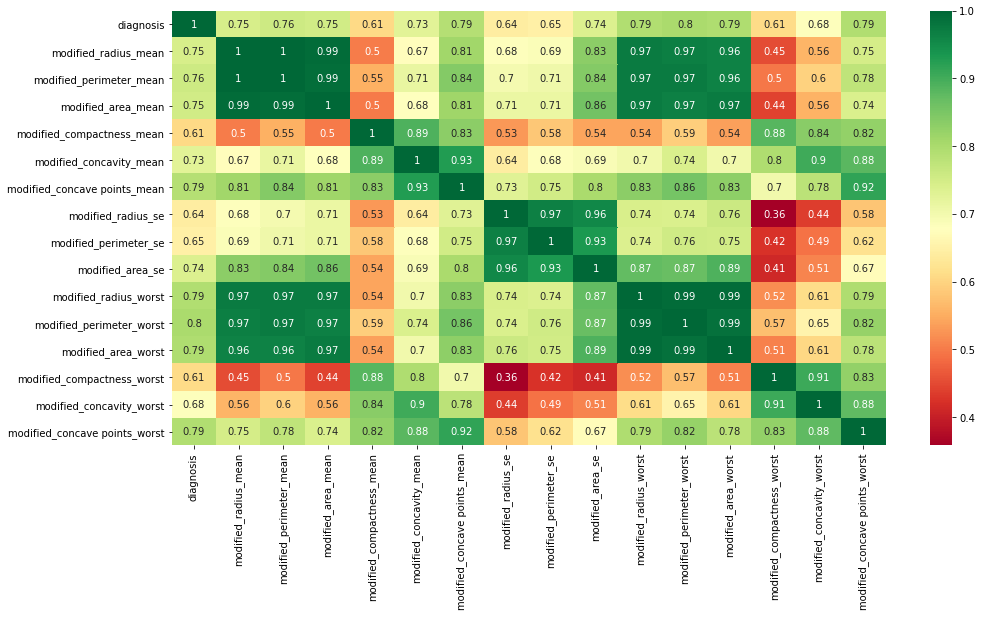

In [189]:
# most correlated features
cormat= df.corr()
top_correlated_features= cormat.index[abs(cormat["diagnosis"]>0.5)]
plt.figure(figsize=(16,8))
g= sns.heatmap(df[top_correlated_features].corr(),annot=True,cmap="RdYlGn")

**Observations:**

- These features are highly correlated with the target feature
- These features have correlation greater than 0.5

# Drop columns which are less correlated with target 

In [194]:
#droping columns which are not needed for the training
df=df.drop(["modified_texture_mean","modified_smoothness_mean","modified_symmetry_mean","modified_fractal_dimension_se","modified_texture_se","modified_smoothness_se","modified_compactness_se","modified_concavity_se","modified_concave points_se","modified_symmetry_se","modified_fractal_dimension_se","modified_texture_worst","modified_smoothness_worst","modified_symmetry_worst","modified_fractal_dimension_worst"],axis=1)

In [195]:
df.head()

,diagnosis,modified_radius_mean,modified_perimeter_mean,modified_area_mean,modified_compactness_mean,modified_concavity_mean,modified_concave points_mean,modified_radius_se,modified_perimeter_se,modified_area_se,modified_radius_worst,modified_perimeter_worst,modified_area_worst,modified_compactness_worst,modified_concavity_worst,modified_concave points_worst
0,1,17.99,122.80,1001.0,0.22862,0.28241,0.14710,0.84865,5.9835,86.20,25.38,184.60,1937.05,0.62695,0.7119,0.2654
1,1,20.57,132.90,1326.0,0.07864,0.08690,0.07017,0.54350,3.3980,74.08,24.99,158.80,1937.05,0.18660,0.2416,0.1860
2,1,19.69,130.00,1203.0,0.15990,0.19740,0.12790,0.74560,4.5850,86.20,23.57,152.50,1709.00,0.42450,0.4504,0.2430
3,1,11.42,77.58,386.1,0.22862,0.24140,0.10520,0.49560,3.4450,27.23,14.91,98.87,567.70,0.62695,0.6869,0.2575
4,1,20.29,135.10,1297.0,0.13280,0.19800,0.10430,0.75720,5.4380,86.20,22.54,152.20,1575.00,0.20500,0.4000,0.1625


In [196]:
df.shape

(569, 16)

# Predictive Modelling

# Split the feature and target output

In [197]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

# Train test Split

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 8)

**Obesarvation:**

- We train the model using the training set and then apply the model to the test set. In this way, we can evaluate the performance of our model.

# Support vector machine(SVR)

In [199]:
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
result_svc=metrics.accuracy_score(y_test, y_pred)
print("Support vector machine:",round(result_svc*100,2))

Support vector machine: 92.28


# Logistic Regression

In [200]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
result_lr=metrics.accuracy_score(y_test, y_pred)
print("LogisticRegression:",round(result_lr*100,2))

LogisticRegression: 93.33


# Decision Tree Classifier

In [201]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
result_dt=metrics.accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier:",round(result_dt*100,2))

DecisionTreeClassifier: 92.28


# Random Forest Classifier

In [202]:
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
result_rf=metrics.accuracy_score(y_test, y_pred)
print("RandomForestClassifier",round(result_rf*100,2))

RandomForestClassifier 94.39


# Observation:

**Accuracy**
- Random Forest Classifier **>** Logistic Regression **>** Decision Tree Classifier **=** Support Vector Machine(SVR)
- Random Forest Classifier show highest accuracy **(94.39%).**

**So the best model is Random Forest**

# Project Outcomes & Conclusions

**Here are some of the key outcomes of the project:**
- The Dataset was quiet small totalling around 569 samples & after preprocessing 7.3% of the datasamples were dropped.
- The samples were slightly imbalanced after processing, hence adding more samples to the dataset.
- Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
- Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
- Testing multiple algorithms  gave us some understanding on the model performance for various algorithms on this specific dataset.
- The Random Forest Classifier & Logistic Regression performed exceptionally well on the current dataset, considering Accuracy as the key-metric.